# FINAL PROJECT 3: ENSEMBLE MODEL
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science
## Member Kelompok: 
- Yusraini Nurul Asra

## A. Introduction
### Abstract
<p style='text-align: justify;'>
Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.</p>

<p style='text-align: justify;'>
Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet dan obesitas yang tidak sehat, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.</p>

<p style='text-align: justify;'>
Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen dimana Ensemble Learning Model dapat sangat membantu.</p>

### Data
<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data" style="text-decoration: none;"><b style="font-style: italic">Heart Failure Prediction</b></a> :
<br><br>
Dataset ini terdiri dari 13 atribut dengan 299 rows. Dalam kasus ini target dari hasil prediksi keselamatan pasien dari penyakit jantung adalah DEATH_EVENT atau kematian</p>

<ul style="text-transform: capitalize">
    <li>age: umur pasien</li>
    <li>anaemia: apakah ada pengurangan haemoglobin</li>
    <li>creatinine_phosphokinase: level enzim CPK dalam mcg/L</li>
    <li>diabetes: apakah pasien punya riwayat diabetes</li>
    <li>ejection_fraction: persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung</li>
    <li>high_blood_pressure: apakah pasien punya darah tinggi</li>
    <li>platelets: jumlah platelet di darah dalam kiloplatelets/mL</li>
    <li>serum_creatinine: level serum creatinine di darah dalam mg/dL</li>
    <li>serum_sodium: level serum sodium di darah dalam mEq/L</li>
    <li>sex: apakah pasien pria atau wanita</li>
    <li>smoking: apakah pasien merokok</li>
    <li>time: waktu dalam hari untuk follow-up</li>
    <li>DEATH_EVENT: apakah pasien sudah meninggal saat waktu follow-up</li>
</ul>

### Objective
Objective yang ingin dicapai dalam analisis ini, yaitu:
<ul style="text-transform: capitalize">
    <li>Mampu memahami konsep Classification dengan Ensemble Model</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam Ensemble Model</li>
    <li>Mampu mengimplementasikan Ensemble Model untuk membuat prediksi</li>
</ul>

## B. Import Libraries

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from scipy.integrate import simps

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from pickle import dump,load

# Resampling
from imblearn.over_sampling import SMOTE

# Settings
pd.set_option("display.max.columns",None)
%matplotlib inline
mpl.style.use(["seaborn"])

## C. Data Loading

### Import Dataset

Import *heart_failure_clinical_records_dataset.csv* sebagai *df*

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))

Data tersebut memiliki jumlah baris 299 dan kolom berjumlah 13


## D. Data Cleaning

In [4]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Check Duplicated Data

In [5]:
# Mengecek data duplikat
df.duplicated().sum()

0

### Check Missing Values

In [6]:
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,unique,sample
age,float64,0,47,51.0
anaemia,int64,0,2,1.0
creatinine_phosphokinase,int64,0,208,2794.0
diabetes,int64,0,2,1.0
ejection_fraction,int64,0,17,40.0
high_blood_pressure,int64,0,2,1.0
platelets,float64,0,176,141000.0
serum_creatinine,float64,0,40,2.4
serum_sodium,int64,0,27,134.0
sex,int64,0,2,0.0


Pada dataset tidak terdapat duplicated data ataupun missing values sehingga tidak perlu dilakukan drop pada column manapun. Selain itu untuk memudahkan, pada dataset juga tidak dilakukan rename pada columnsnya.

### Removing Outliers

In [7]:
# Terlebih dahulu membedakan mana yang data kategorik dan data numerik
cat_cols = ["anaemia","diabetes","high_blood_pressure","sex","smoking","death_event"]
num_cols = [i for i in df.columns if i not in cat_cols]

print(f"Categorical Columns\t({len(cat_cols)})\t: {list(cat_cols)}")
print(f"Numerical Columns\t({len(num_cols)})\t: {list(num_cols)}")

Categorical Columns	(6)	: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']
Numerical Columns	(8)	: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']


Untuk mendapatkan hasil yang lebih akurat nantinya, maka perlu dilakukan removing outliers (pencilan). Terlebih dahulu akan dibuat fungsi untuk mendeteksi outliers serta visualisasi outliersnya.

In [8]:
# Fungsi untuk Visualisasi Outliers
def create_boxplot(nrows,ncols,data,x_axis):

    fig,ax = plt.subplots(nrows,ncols,figsize=(25,15),dpi=200)

    n = 0
    for nrow in range(nrows):
        for ncol in range(ncols):
            sns.boxplot(data=data,x=x_axis[n],ax=ax[nrow,ncol])
            ax[nrow,ncol].set_title(f"Box Plot of {x_axis[n]}")
            n += 1
            if n == len(x_axis):
                break

    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

# Fungsi untuk Deteksi Outliers
def find_outlier(data):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)
    
    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)
    
    return outlier

# Fungsi untuk Menampilkan Outliers dalam Tabel
def show_outlier(data,variables):
    return pd.DataFrame({
        "outliers":[len(j) for j in [find_outlier(data[i]) for i in variables]],
        "percentage":np.array([len(j) for j in [find_outlier(data[i]) for i in variables]]) / len(data) * 100
    }).set_index([variables]).sort_values("outliers",ascending=False)

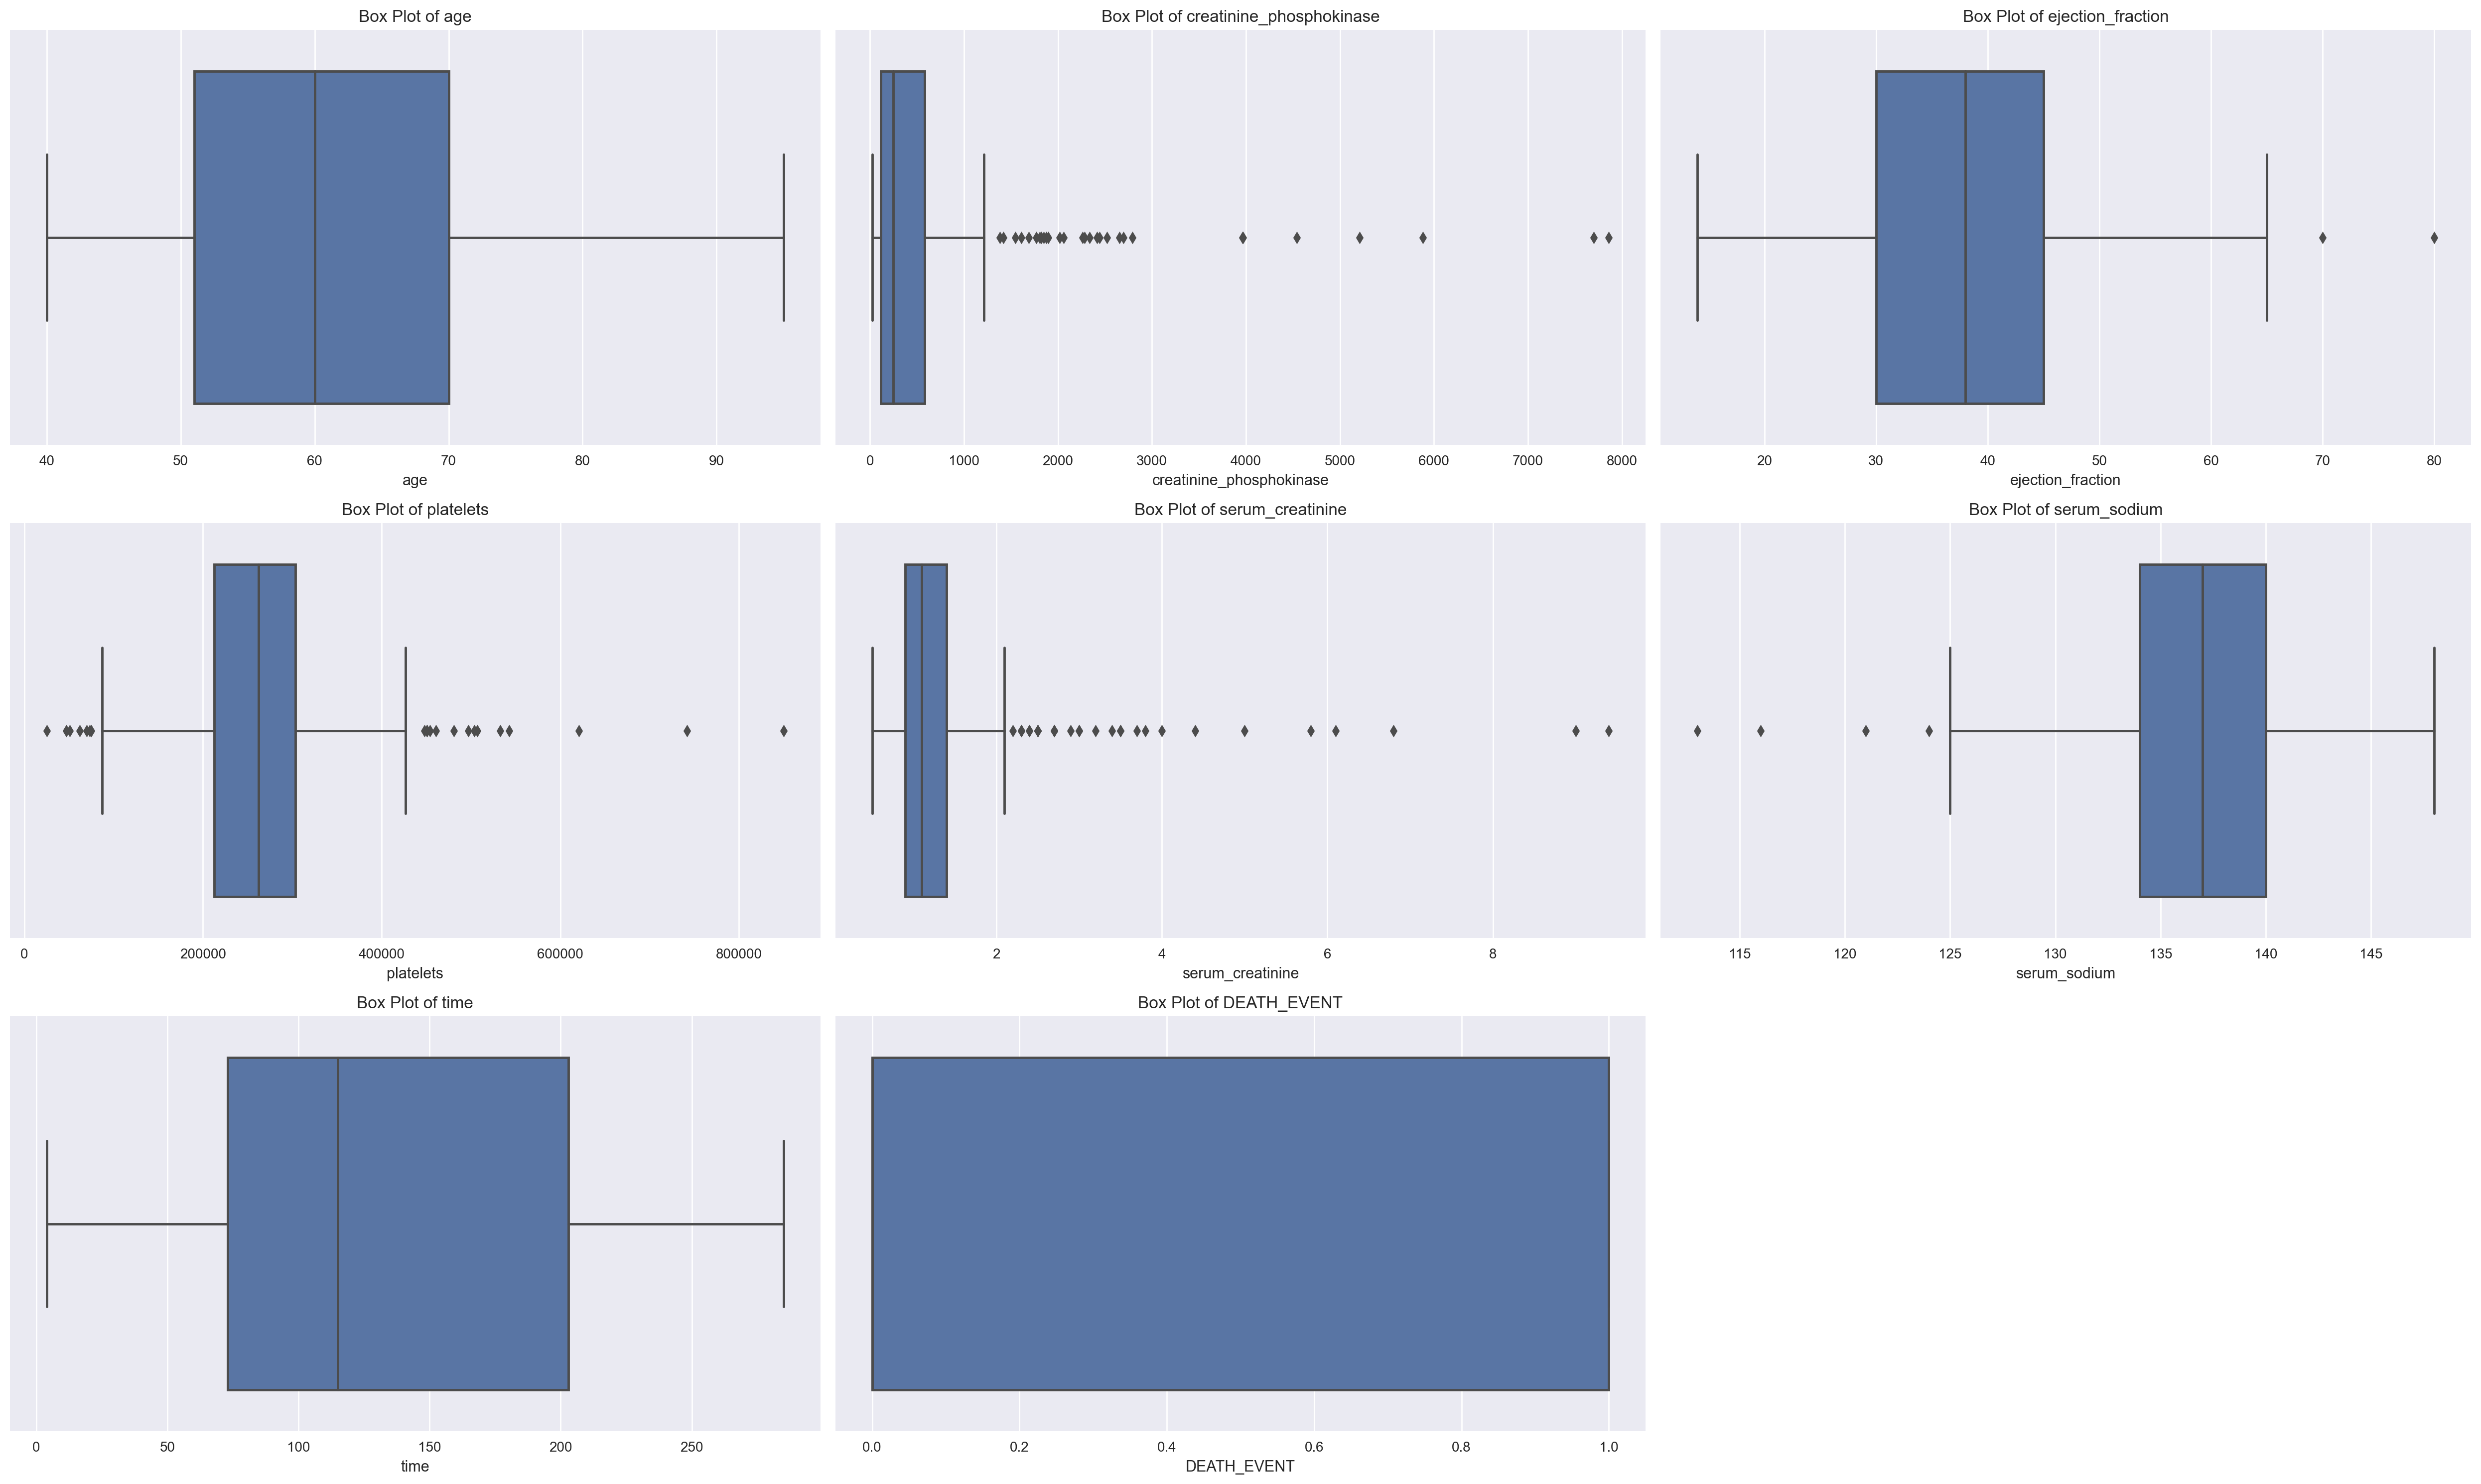

,outliers,percentage
creatinine_phosphokinase,29,9.698997
serum_creatinine,29,9.698997
platelets,21,7.023411
serum_sodium,4,1.337793
ejection_fraction,2,0.668896
age,0,0.000000
time,0,0.000000
DEATH_EVENT,0,0.000000


In [9]:
# Memvisualisasikan Outliers
create_boxplot(3,3,df,num_cols)

# Mendeteksi Outliers
show_outlier(df,num_cols)

Dapat dilihat di atas bahwa terdapat beberapa outliers, akan dilakukan removing outliers untuk mendapatkan hasil yang lebih akurat nantinya. Removing outliers dilakukan dengan metode IQR (Interquartile Range).

In [10]:
for i in num_cols:
    q1 = np.quantile(df[i],0.25)
    q3 = np.quantile(df[i],0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)

    df = df[(df[i] >= min_iqr) & (df[i] <= max_iqr)]

Cek kembali outliers pada dataset setelah dilakukan removing outliers dengan metode IQR.

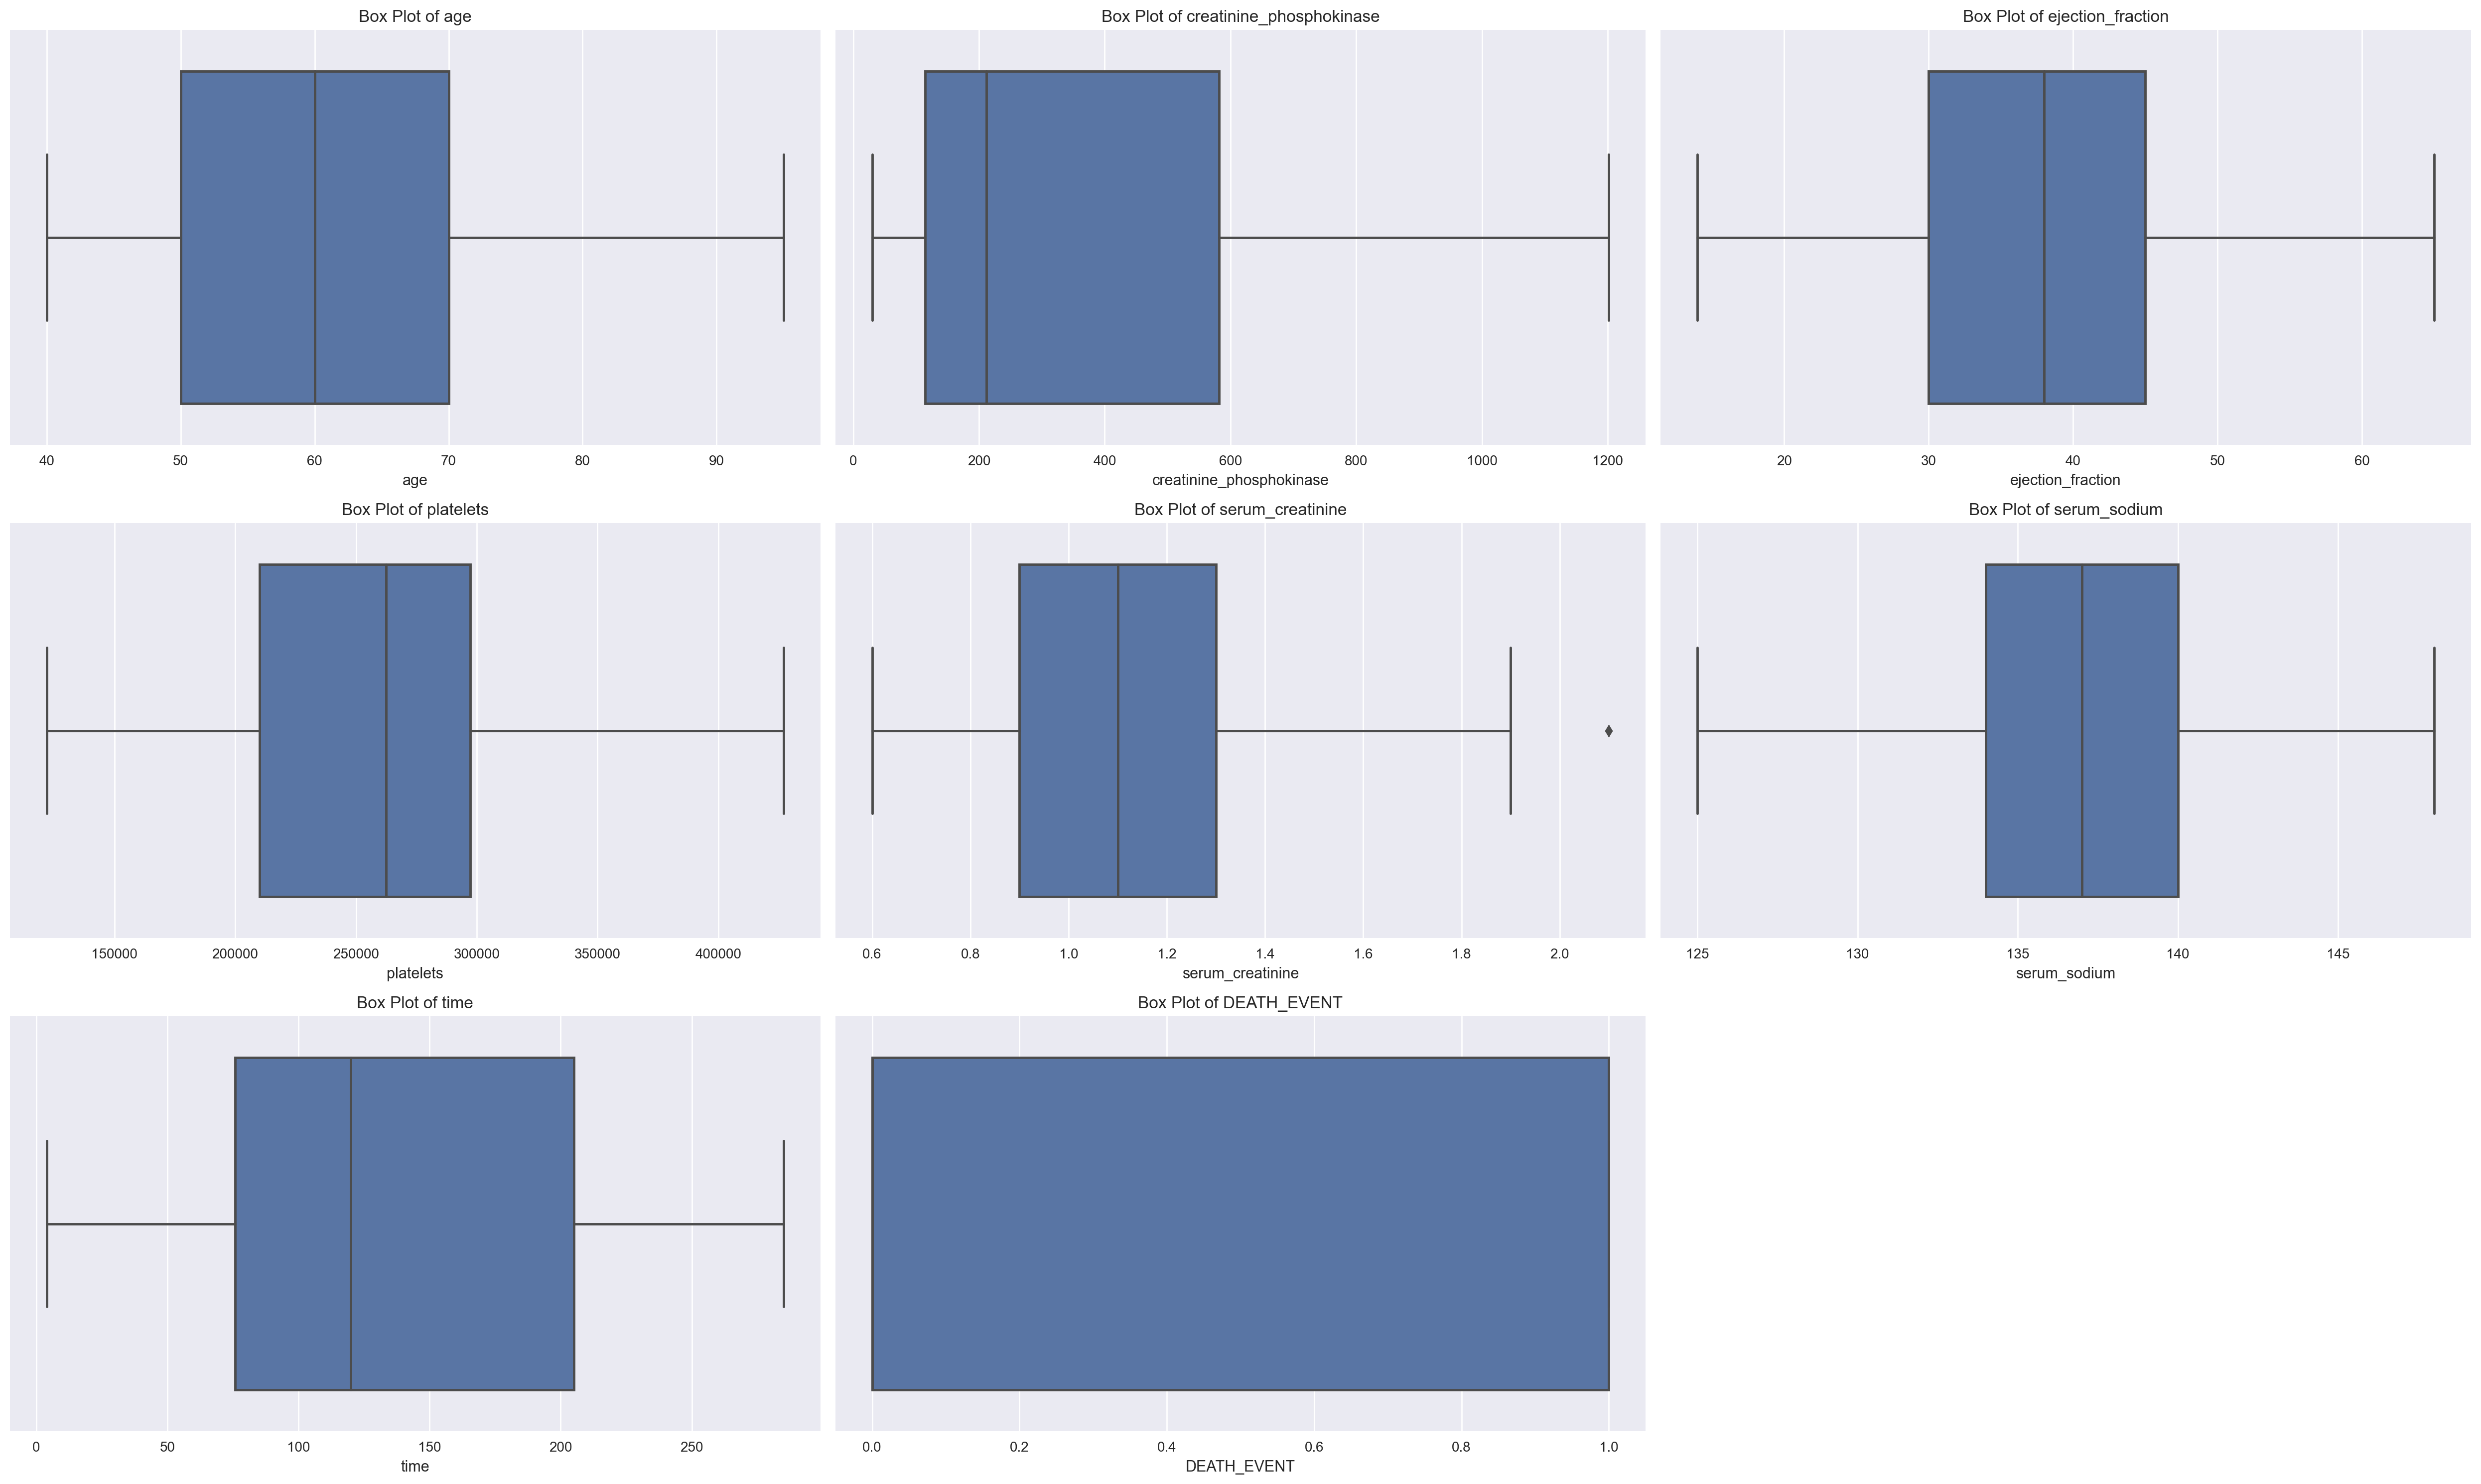

,outliers,percentage
serum_creatinine,3,1.339286
age,0,0.000000
creatinine_phosphokinase,0,0.000000
ejection_fraction,0,0.000000
platelets,0,0.000000
serum_sodium,0,0.000000
time,0,0.000000
DEATH_EVENT,0,0.000000


In [11]:
# Visualisasikan outliers kembali setelah melakukan removing outliers
create_boxplot(3,3,df,num_cols)

# Menampilkan outliers kembali setelah melakukan removing outliers
show_outlier(df,num_cols)

## E. Exploration Data Analysis

### Measure Central of Tendency

In [12]:
# Measure Central of Tendency : Mean, Median, Modus
MCT = df.describe().T
MCT.reset_index().rename(
    columns={'index': 'Attribute'})

,Attribute,count,mean,std,min,25%,50%,75%,max
0,age,224.0,60.809527,11.946085,40.0,50.00,60.0,70.0,95.0
1,anaemia,224.0,0.468750,0.500140,0.0,0.00,0.0,1.0,1.0
2,creatinine_phosphokinase,224.0,336.941964,279.521085,30.0,114.50,212.0,582.0,1202.0
3,diabetes,224.0,0.419643,0.494606,0.0,0.00,0.0,1.0,1.0
4,ejection_fraction,224.0,38.178571,11.710801,14.0,30.00,38.0,45.0,65.0
5,high_blood_pressure,224.0,0.379464,0.486340,0.0,0.00,0.0,1.0,1.0
6,platelets,224.0,255865.190045,67153.749051,122000.0,210000.00,262500.0,297250.0,427000.0
7,serum_creatinine,224.0,1.128571,0.327794,0.6,0.90,1.1,1.3,2.1
8,serum_sodium,224.0,137.044643,3.806740,125.0,134.00,137.0,140.0,148.0
9,sex,224.0,0.642857,0.480231,0.0,0.00,1.0,1.0,1.0


### Measure of Spread/Dispersion dan Shape

In [13]:
# Measure of Spread/Dispersion : Variance, Range, Interquartile Range
# Measure of Shape : Skewness, Kurtosis

# Variance
variance_df = df.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance_df.rename(columns={0: 'Variance'}, inplace=True)

# Skewness
skewness_df = df.select_dtypes(include=[np.number]).skew().to_frame()
skewness_df.rename(columns={0: 'Skewness'}, inplace=True)
skewness_df['Skewness Description'] = skewness_df['Skewness'].apply(
    lambda x: 'Distribusi Positif' if x > 0 else ('Distribusi Negatif' if x < 0 else 'Distribusi Simetrik'))

# Kurtosis
kurtosis_df = df.select_dtypes(include=[np.number]).kurtosis().to_frame()
kurtosis_df.rename(columns={0: 'Kurtosis'}, inplace=True)
kurtosis_df['Kurtosis Description'] = kurtosis_df['Kurtosis'].apply(
    lambda x: 'Leptokurtik' if x > 0 else ('Platykurtik' if x < 0 else 'Mesokurtik'))

# IQR
percentile_values = df.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
percentile_values.index = ['25%', '50%', '75%']
percentile_values = percentile_values.T
percentile_values['IQR'] = percentile_values['75%'] - percentile_values['25%']

# Menggabungkan semua hasil
Measure_of_Spread = pd.concat([variance_df, skewness_df, kurtosis_df, percentile_values['IQR']], axis=1)

# Tampilkan hasilnya
Measure_of_Spread.reset_index().rename(columns={'index': 'Attribute'})

,Attribute,Variance,Skewness,Skewness Description,Kurtosis,Kurtosis Description,IQR
0,age,1.427089e+02,0.374449,Distribusi Positif,-0.223656,Platykurtik,20.00
1,anaemia,2.501401e-01,0.126091,Distribusi Positif,-2.002057,Platykurtik,1.00
2,creatinine_phosphokinase,7.813204e+04,0.972818,Distribusi Positif,0.069126,Leptokurtik,467.50
3,diabetes,2.446348e-01,0.327861,Distribusi Positif,-1.909638,Platykurtik,1.00
4,ejection_fraction,1.371429e+02,0.382511,Distribusi Positif,-0.407808,Platykurtik,15.00
5,high_blood_pressure,2.365271e-01,0.500150,Distribusi Positif,-1.765696,Platykurtik,1.00
6,platelets,4.509626e+09,0.246295,Distribusi Positif,-0.241058,Platykurtik,87250.00
7,serum_creatinine,1.074491e-01,0.940277,Distribusi Positif,0.450167,Leptokurtik,0.40
8,serum_sodium,1.449127e+01,-0.109977,Distribusi Negatif,0.425814,Leptokurtik,6.00
9,sex,2.306214e-01,-0.600312,Distribusi Negatif,-1.654478,Platykurtik,1.00


### Melihat Correlation antara Features dan Target (Death Event) untuk Visualisasi Data Lebih Lanjut

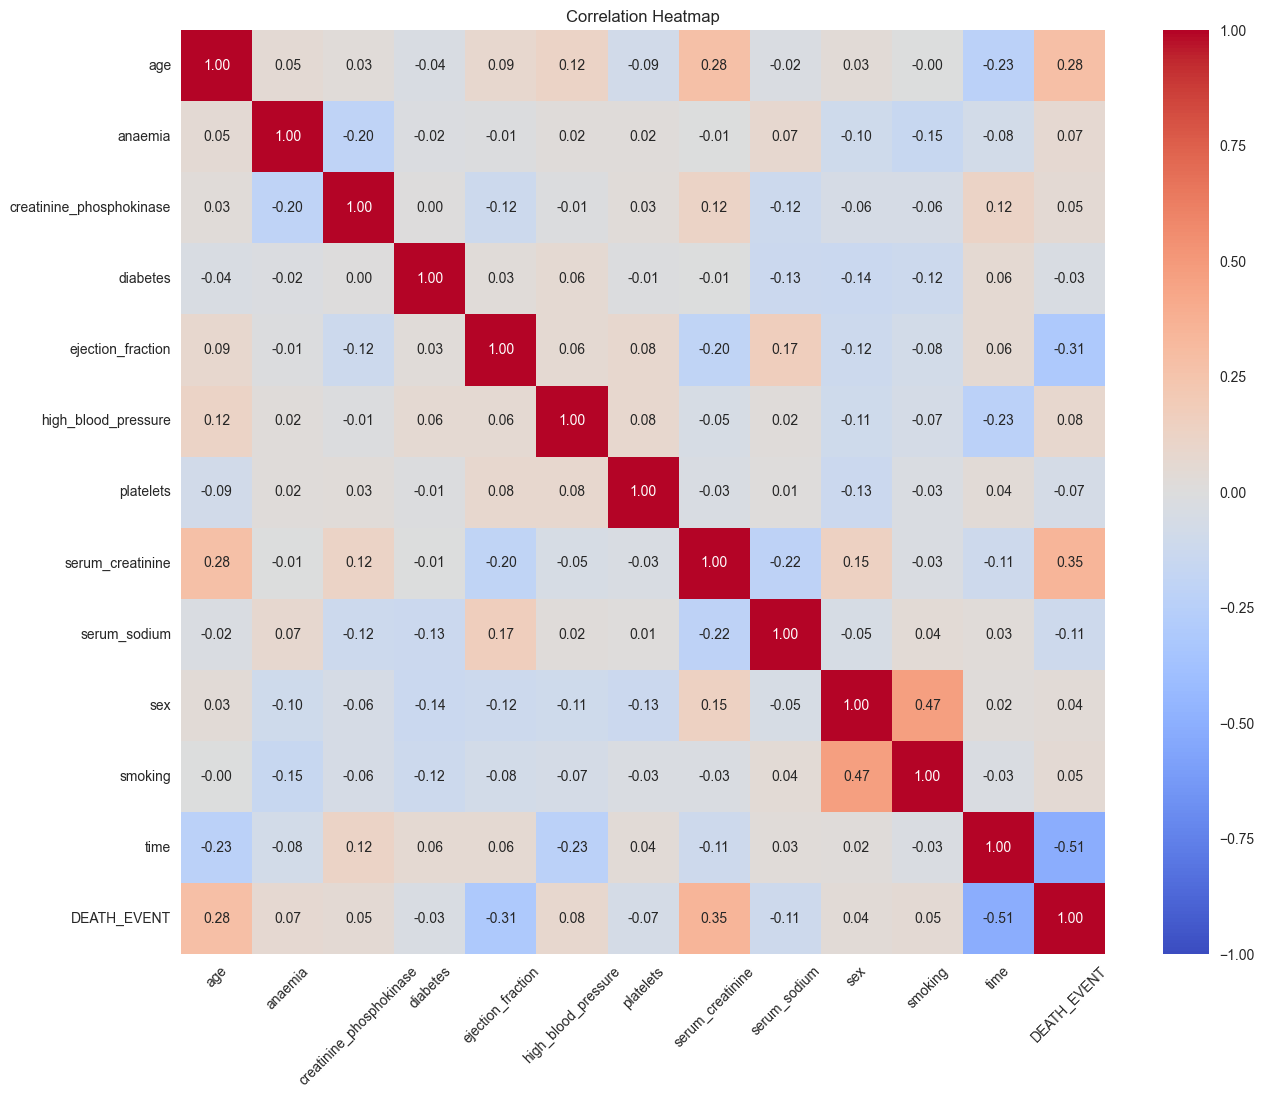

In [14]:
# Dapat dilihat dengan Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

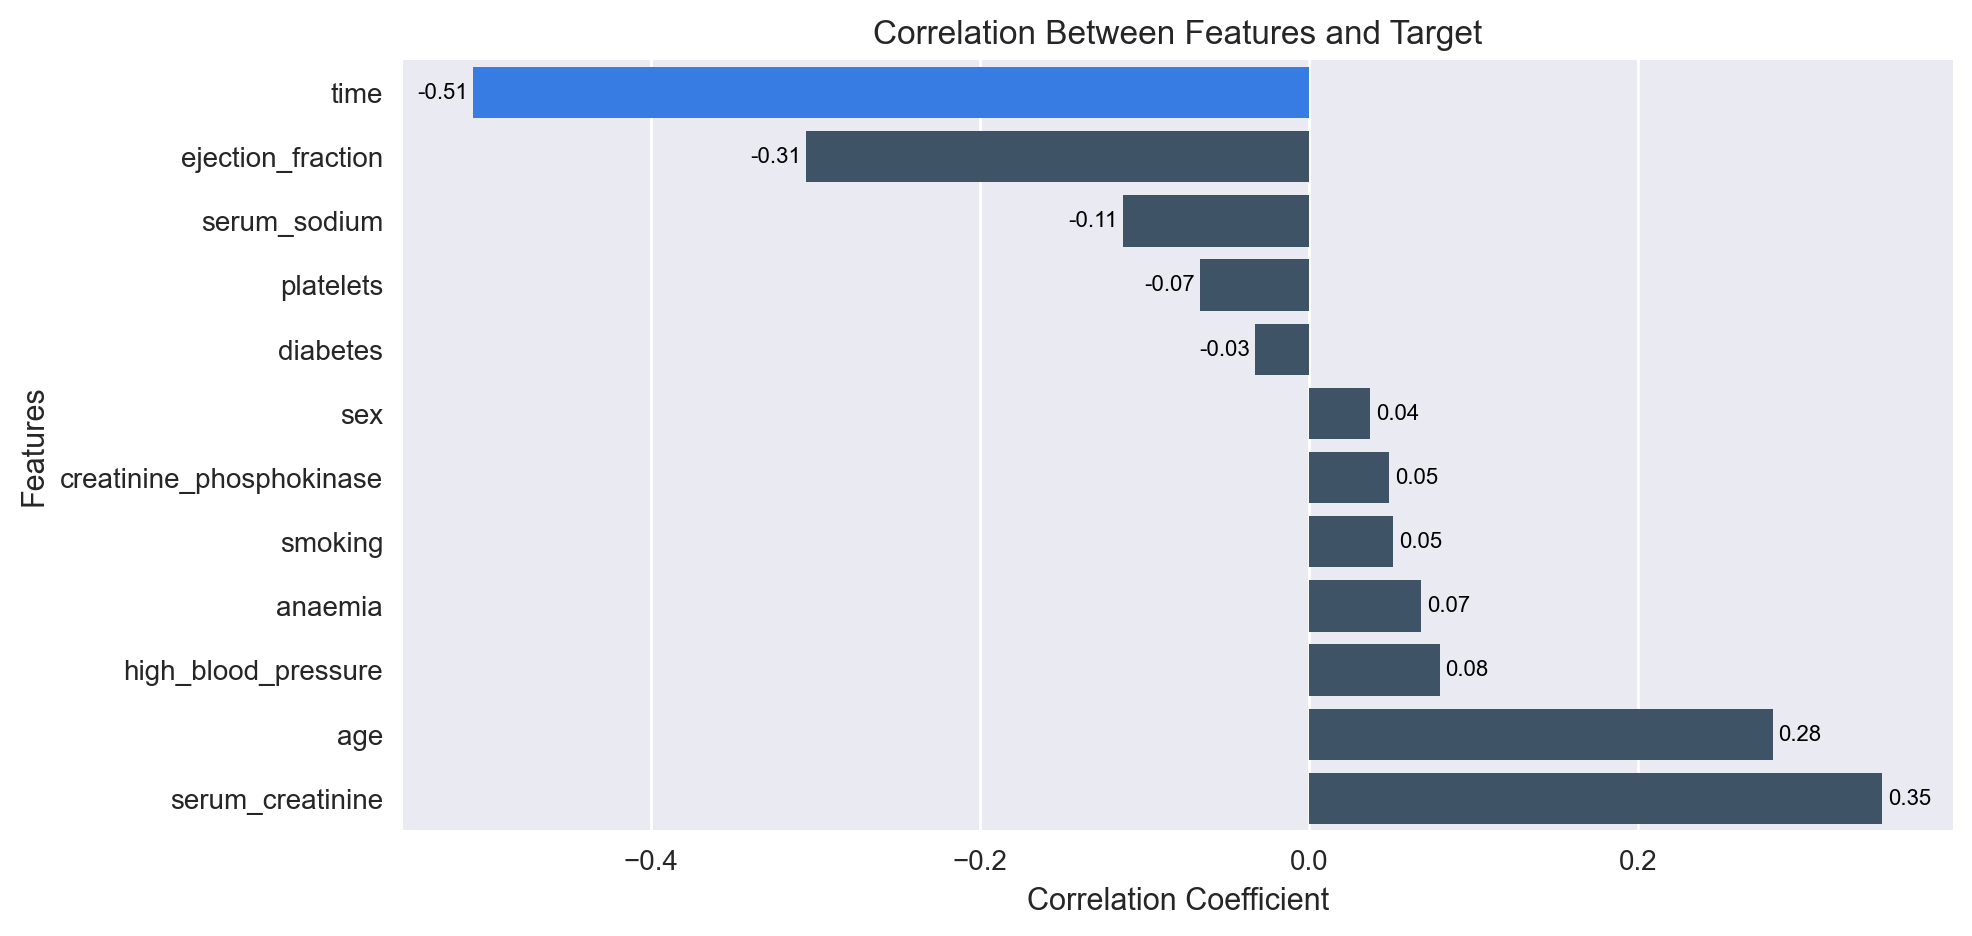

In [15]:
# Membuat plot agar lebih jelas untuk melihat kekuatan dan arah Correlation
df_copy = df.copy()
df_copy["DEATH_EVENT"] = df_copy["DEATH_EVENT"].replace({0:"Survived",1:"Dead"})
corr = pd.get_dummies(df_copy).iloc[:,:-1].corr()[["DEATH_EVENT_Dead"]].iloc[:-1].sort_values("DEATH_EVENT_Dead")

plt.figure(figsize=(10,5),dpi=200)
ax = sns.barplot(
    data=corr,
    x=corr.DEATH_EVENT_Dead,
    y=corr.index,
    palette=["#1a76ff" if i == np.max(abs(corr.DEATH_EVENT_Dead)) else "#37536d" for i in abs(corr.DEATH_EVENT_Dead)]
)

for container in ax.containers:
    ax.bar_label(container,fmt="%.2f",color="black",fontsize=8,padding=2)

plt.title("Correlation Between Features and Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

Berdasarkan plot di atas dapat dilihat kekuatan atau nilai koefisien korelasi serta arahnya. Dapat dilihat feature yang paling mempengaruhi adalah time, disusul dengan serum_creatinine lalu ejection_fraction dst.

### Visualisasi Data

#### How's The Death Event Percentage?

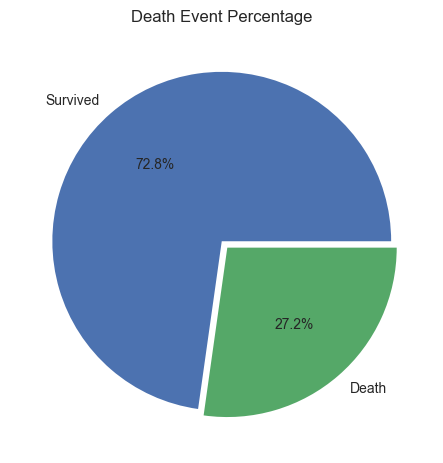

In [16]:
# Menghitung jumlah death event
death_counts = df['DEATH_EVENT'].value_counts()

# Membuat pie chart
plt.pie(death_counts, labels=['Survived', 'Death'], autopct='%1.1f%%',explode=[0,0.05])
plt.title('Death Event Percentage')
plt.show()

Dari pie chart di atas dapat dilihat bahwa pada dataset tersebut persentase pasien yang survived lebih banyak yakni sebesar 72.8% sedangkan pasien yang meninggal sebanyak 27.2%.

#### Does Time Affect Death Event The Most?

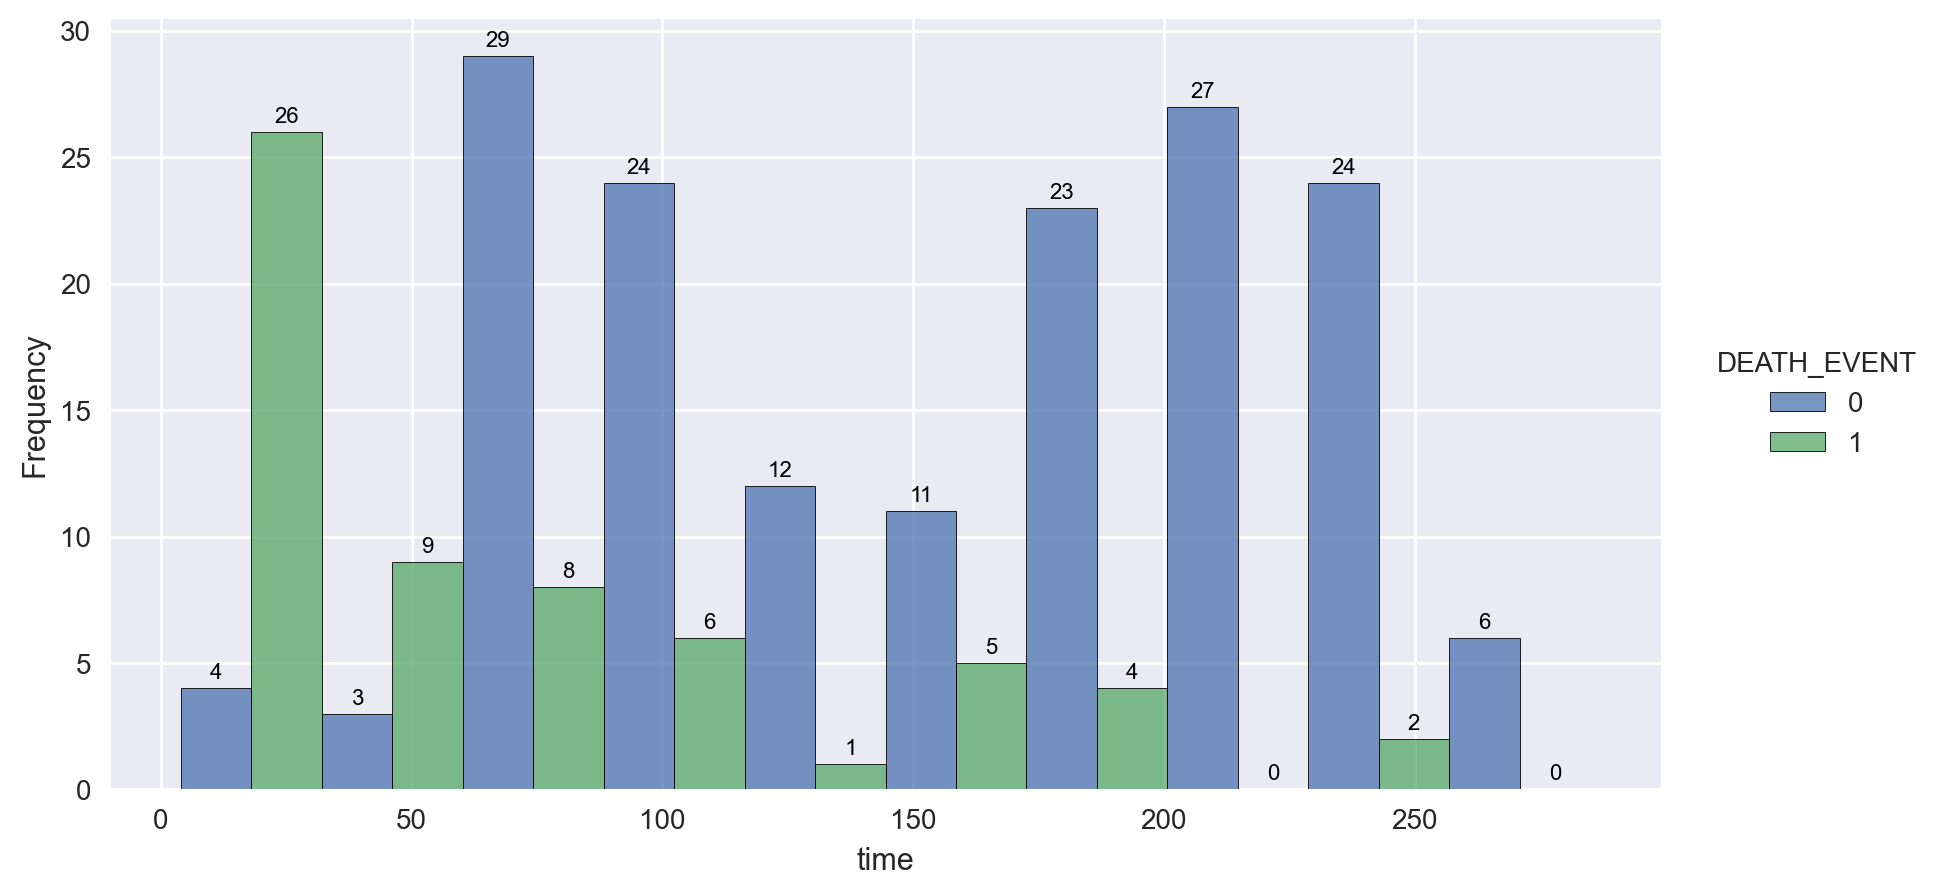

In [17]:
plt.figure(figsize=(10,5),dpi=200)
ax = sns.histplot(df,x="time",hue="DEATH_EVENT",multiple="dodge",bins=10)

for container in ax.containers:
    ax.bar_label(container,color="black",fontsize=8,padding=2)

sns.move_legend(ax,loc="center left",bbox_to_anchor=(1.02,0.5))
plt.ylabel("Frequency")
plt.show()

Dari plot di atas dapat dilihat bahwa semakin banyak waktu penanganan (follow-up) maka kemungkinan pasien akan meninggal akan lebih kecil. Begitu pula sebaliknya, semakin sedikit waktu follow-up, kemungkinan pasien meninggal besar. Hal ini sesuai dengan korelasinya yang bertanda negatif artinya time memiliki pengaruh berlawan arah terhadap target (Death Event).

#### Ejection Fraction vs Serum Creatinine Influence to Death Event 

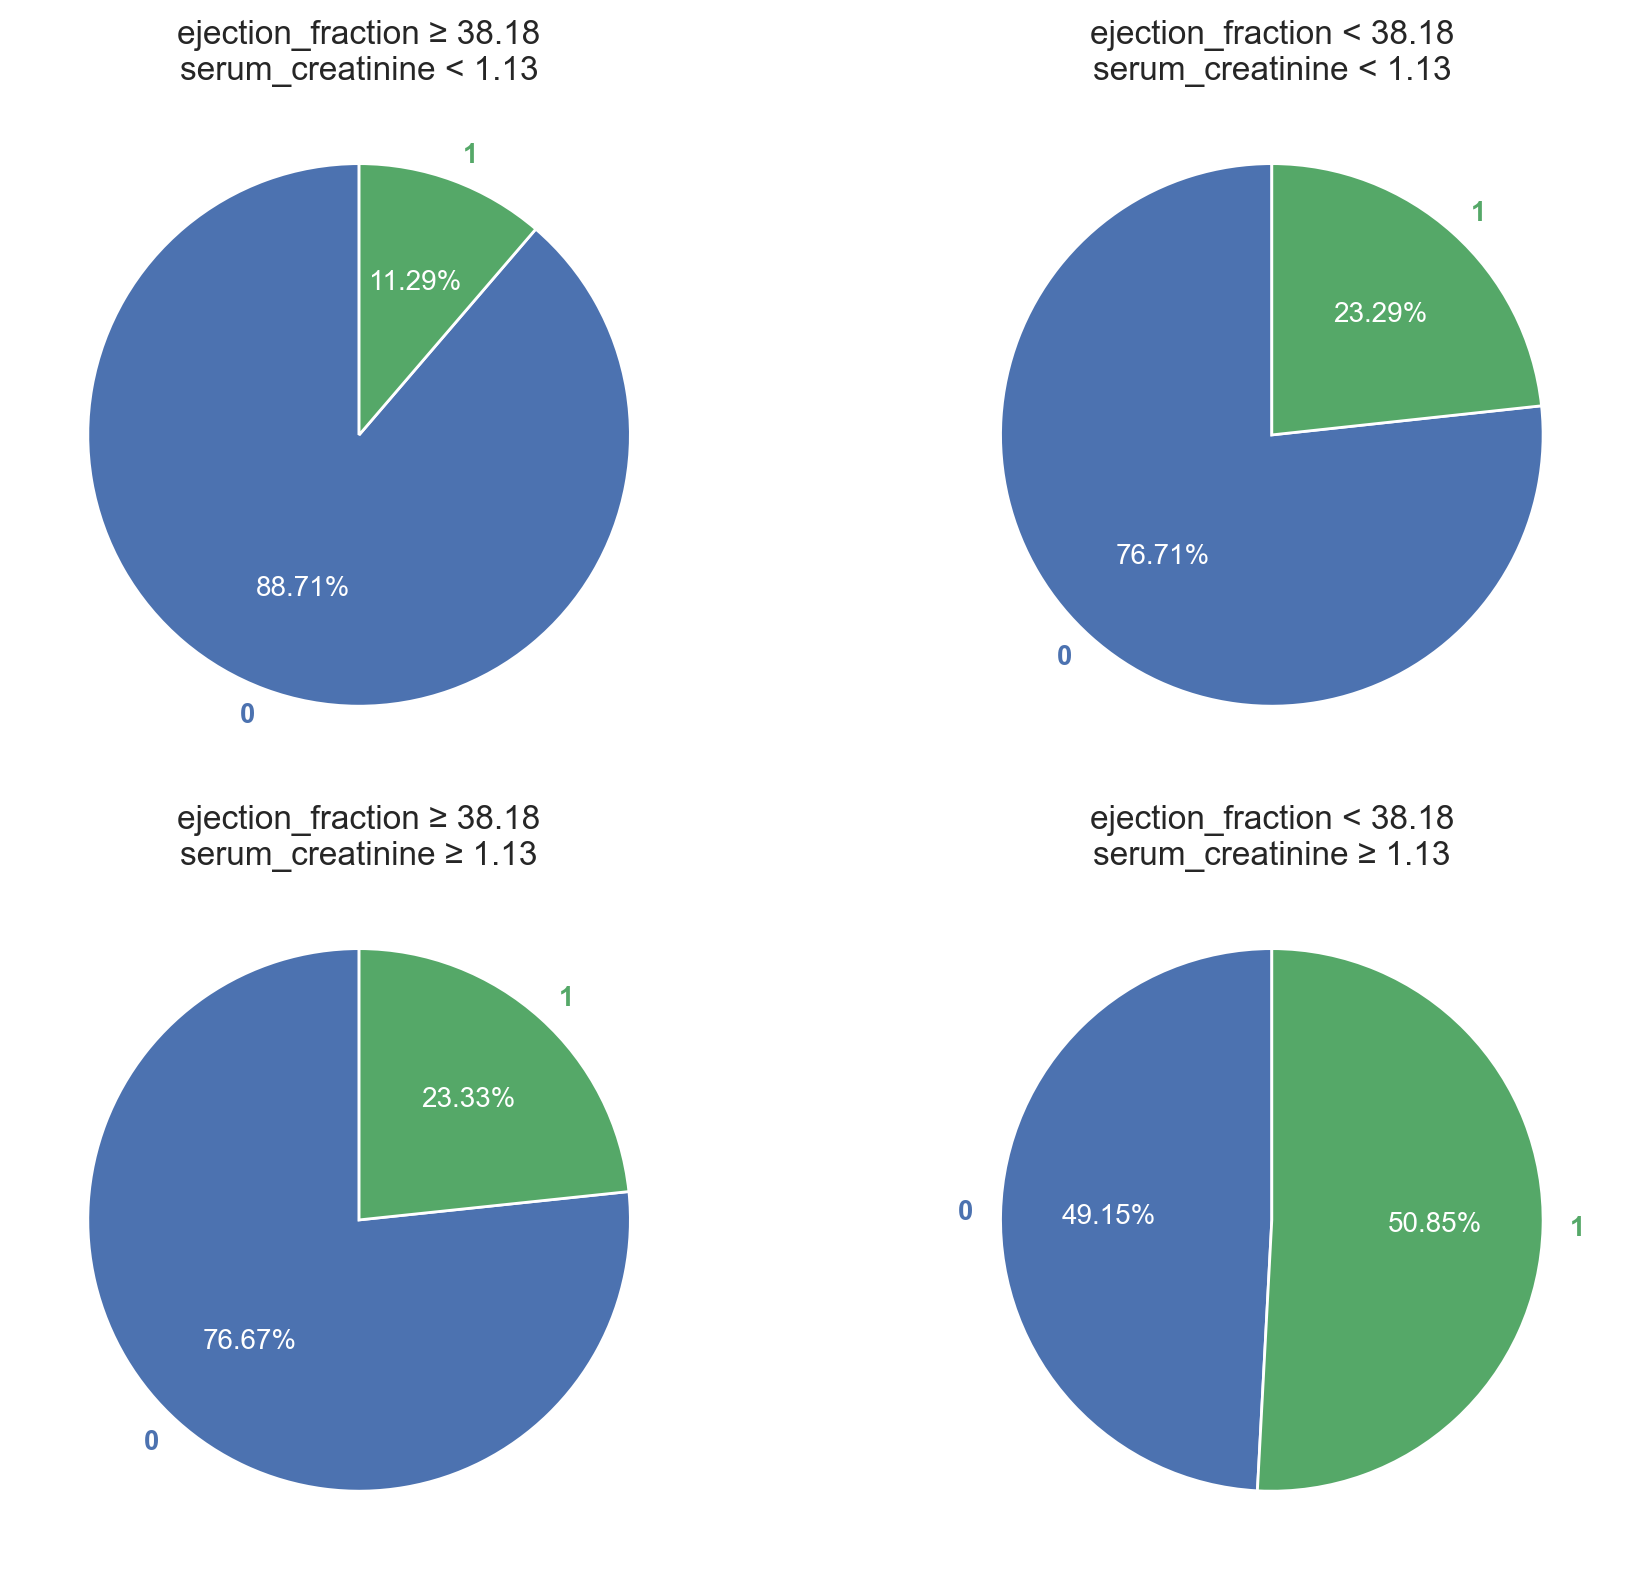

In [18]:
first = df[
    (df["ejection_fraction"] >= np.mean(df["ejection_fraction"])) &
    (df["serum_creatinine"] < np.mean(df["serum_creatinine"]))
].groupby("DEATH_EVENT").count()[["age"]]

second = df[
    (df["ejection_fraction"] < np.mean(df["ejection_fraction"])) &
    (df["serum_creatinine"] < np.mean(df["serum_creatinine"]))
].groupby("DEATH_EVENT").count()[["age"]]

third = df[
    (df["ejection_fraction"] >= np.mean(df["ejection_fraction"])) &
    (df["serum_creatinine"] >= np.mean(df["serum_creatinine"]))
].groupby("DEATH_EVENT").count()[["age"]]

fourth = df[
    (df["ejection_fraction"] < np.mean(df["ejection_fraction"])) &
    (df["serum_creatinine"] >= np.mean(df["serum_creatinine"]))
].groupby("DEATH_EVENT").count()[["age"]]

ejection_fraction_and_serum_creatinine = [first,second,third,fourth]
titles = [
    f"ejection_fraction ≥ {round(np.mean(df['ejection_fraction']),2)}\nserum_creatinine < {round(np.mean(df['serum_creatinine']),2)}",
    f"ejection_fraction < {round(np.mean(df['ejection_fraction']),2)}\nserum_creatinine < {round(np.mean(df['serum_creatinine']),2)}",
    f"ejection_fraction ≥ {round(np.mean(df['ejection_fraction']),2)}\nserum_creatinine ≥ {round(np.mean(df['serum_creatinine']),2)}",
    f"ejection_fraction < {round(np.mean(df['ejection_fraction']),2)}\nserum_creatinine ≥ {round(np.mean(df['serum_creatinine']),2)}",
]

nrows,ncols = 2,2
fig,ax = plt.subplots(nrows,ncols,figsize=(10,8),dpi=200,sharex=True,sharey=True)

n = 0
for nrow in range(nrows):
    for ncol in range(ncols):
        patches,texts,pcts = ax[nrow,ncol].pie(
            ejection_fraction_and_serum_creatinine[n].age,
            labels=ejection_fraction_and_serum_creatinine[n].index,
            startangle=90,
            autopct="%.2f%%",
            wedgeprops={"linewidth":1.0,"edgecolor":"white"}
        )

        ax[nrow,ncol].set_title(titles[n])

        n += 1

        for index,patch in enumerate(patches):
            texts[index].set_color(patch.get_facecolor())

        plt.setp(pcts,color="white")
        plt.setp(texts,fontweight=600)

plt.tight_layout()
plt.show()

Feature yang paling berpengaruh terhadap Death Event setelah time adalah ejection_fraction dan serum_creatinine. Diambil average masing-masing feature. Dari empat pie chart dengan kondisi yang berbeda-beda di atas, dapat dilihat bahwa kemungkinan pasien meninggal akan lebih kecil apabila ejection_fraction tinggi dan the serum_creatinine rendah. Hal ini membuktikan bahwa serum_creatinine memiliki pengaruh searah terhadap Death Event, sedangkan ejection_fraction pengaruhnya berlawan arah, sesuai seperti yang sudah terlihat pada heatmap Correlation sebelumnya.

#### How Many Patients Have Normal Ejection Fraction?

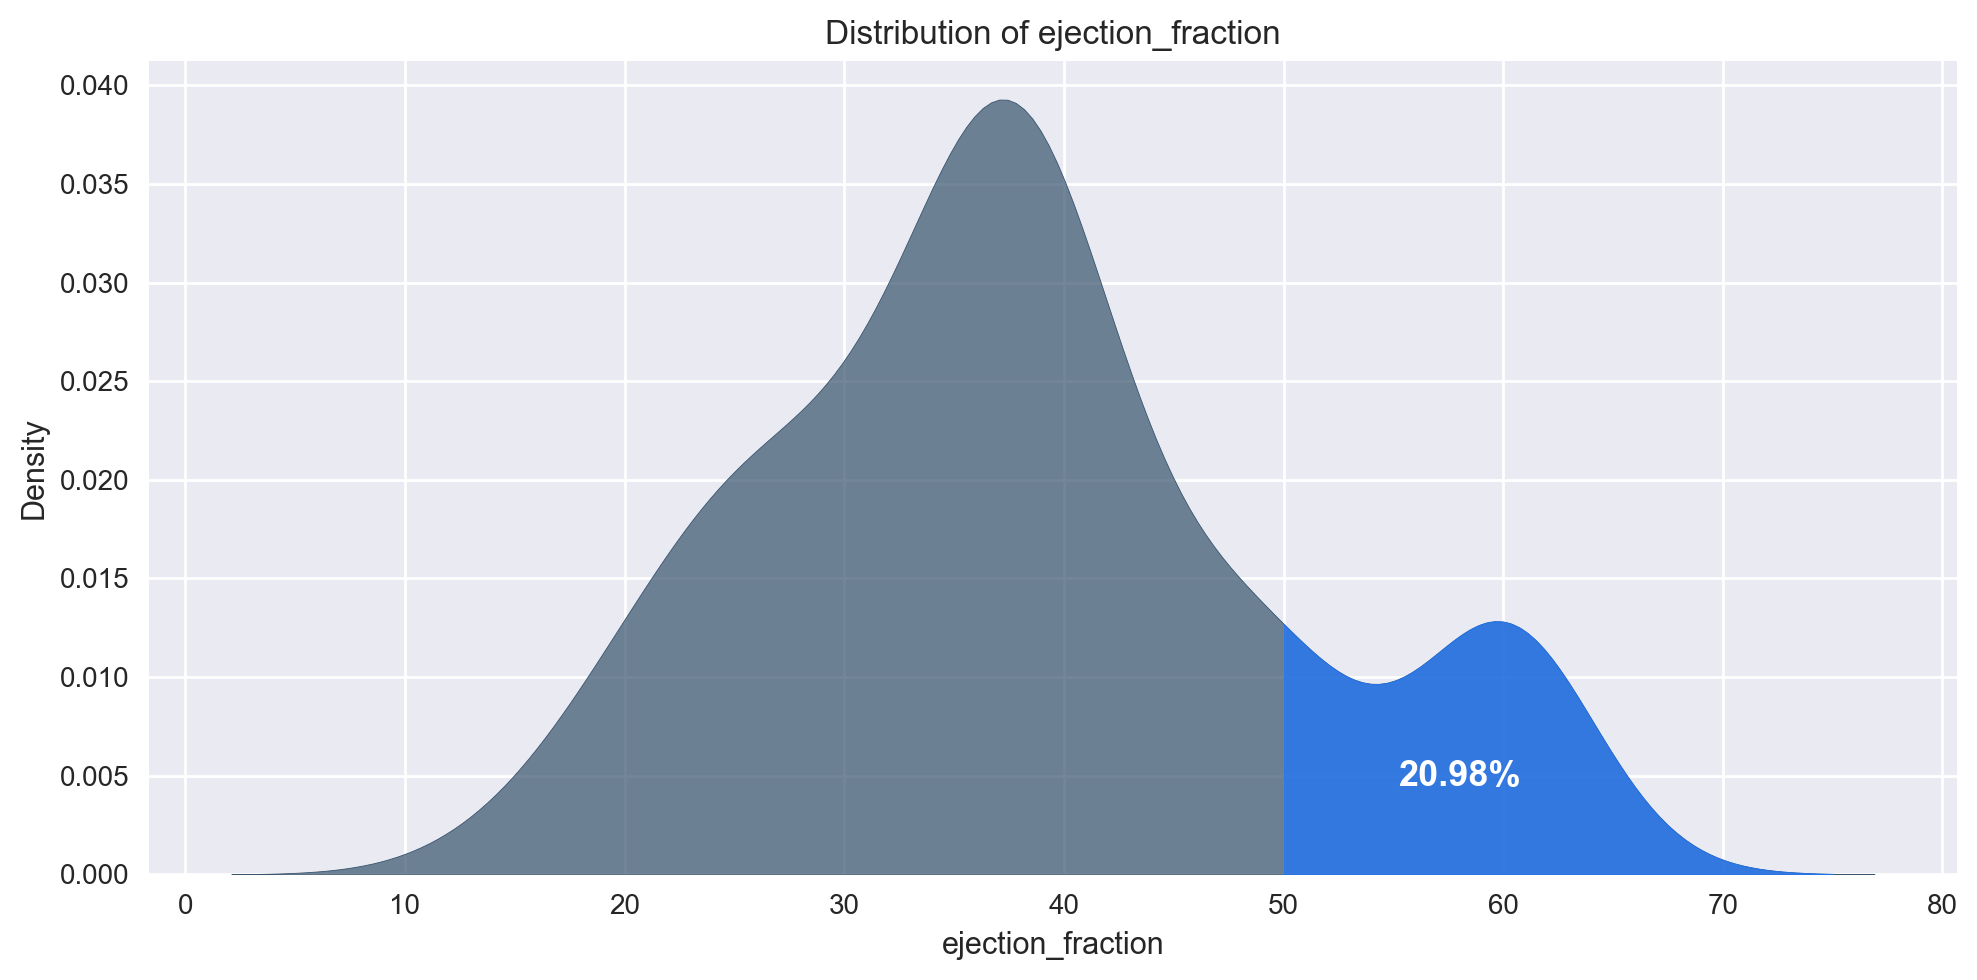

In [19]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

kde_ejection_fraction = sns.kdeplot(ax=ax,data=df,x="ejection_fraction",color="#37536d",fill=True,alpha=0.7)
xmin,xmax = kde_ejection_fraction.get_xlim()
kde = gaussian_kde(df["ejection_fraction"])
x = np.linspace(xmin,xmax,10_000)
kde_y = kde(x)

x0,y0 = [],[]
for i,j in zip(x,kde_y):
    if (i >= 50) & (i <= 75):
        x0.append(i)
        y0.append(j)
x0,y0 = np.array(x0),np.array(y0)

area0 = round(simps(y0,x0,dx=1) * 100,0)
kde_ejection_fraction.fill_between(x=x0,y1=y0,color="#1a76ff",alpha=0.7)

ax.set_title("Distribution of ejection_fraction")
ax.set_xlim(xmin,xmax)
ax.text(
    x=58,
    y=0.0045,
    s=f"{round(len(df[(df['ejection_fraction'] >= 50) & (df['ejection_fraction'] <= 75)]) / len(df) * 100,2)}%",
    horizontalalignment="center",
    color="white",
    fontweight="bold",
    fontsize=13
)

plt.tight_layout()
plt.show()

Menurut sebuah lembaga organisasi non-profit di USA, American Heart Association menyatakan bahwa ejection_fraction yang normal berkisar antara 50%-75%. Berdasarkan plot di atas, hanya terdapat 20.98% pasien yang memiliki normal ejection_fraction.

#### Do Patients Have Correct Range of Serum Creatinine According to Their Sex?

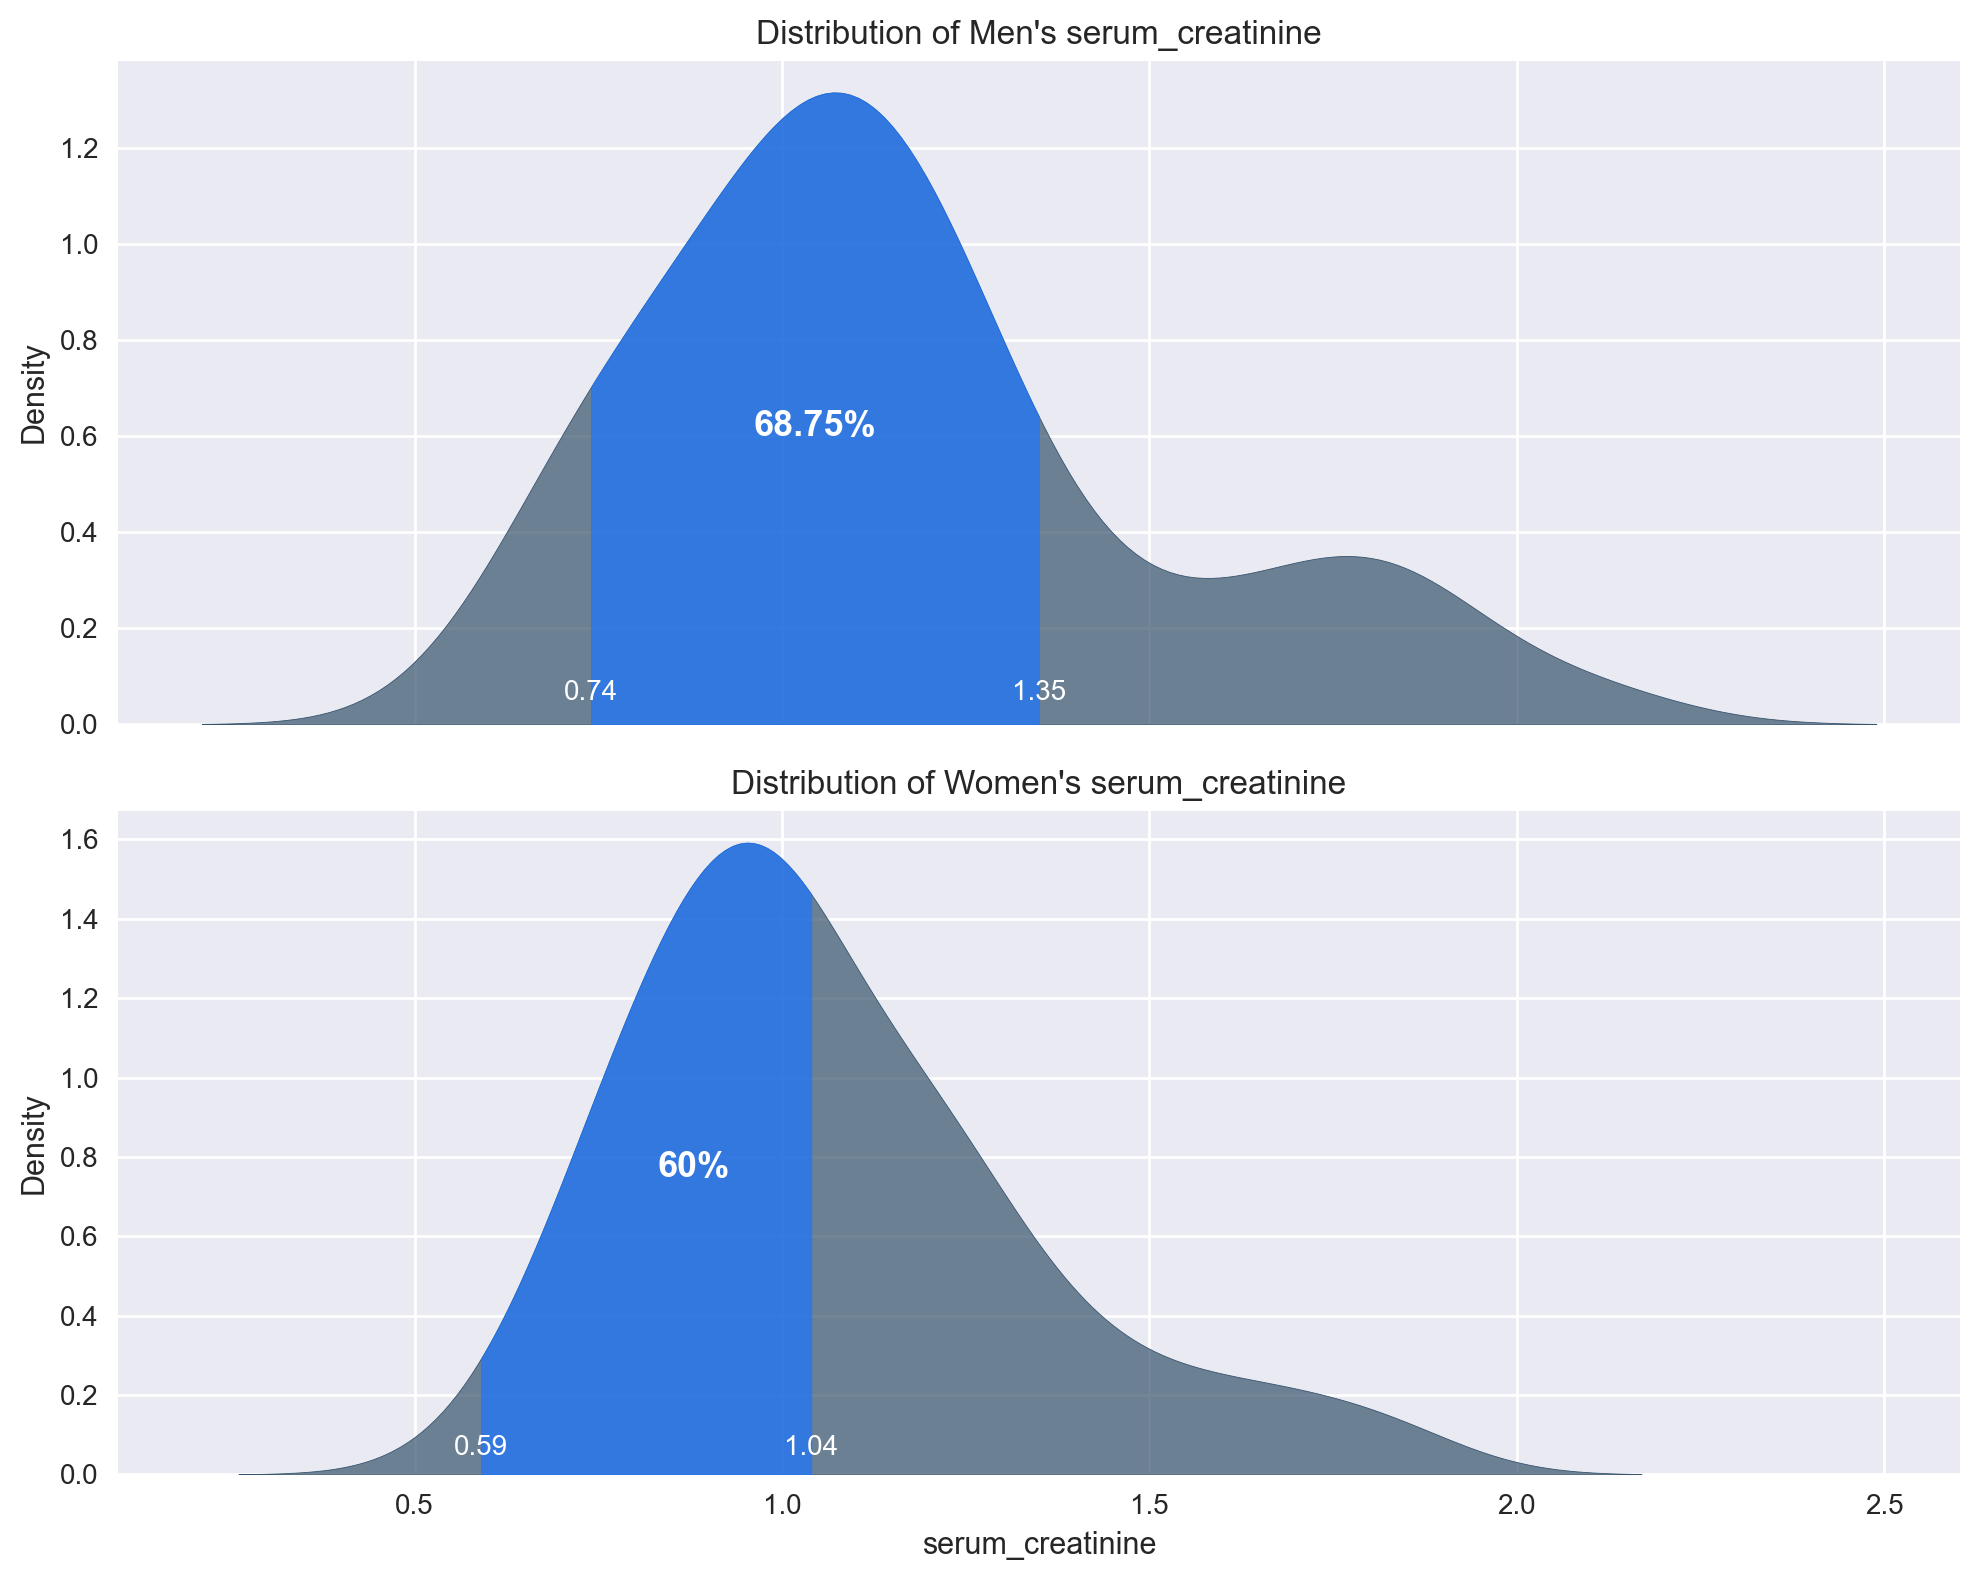

In [20]:
fig,ax = plt.subplots(2,1,figsize=(10,8),dpi=200,sharex=True)

for nrow,lower,upper,sex,title in zip(range(2),[0.74,0.59],[1.35,1.04],[1,0],["Men","Women"]):
    kde_serum_creatinine = sns.kdeplot(ax=ax[nrow],data=df[df["sex"] == sex],x="serum_creatinine",color="#37536d",fill=True,alpha=0.7)
    xmin,xmax = kde_serum_creatinine.get_xlim()
    kde = gaussian_kde(df[df["sex"] == sex]["serum_creatinine"])
    x = np.linspace(xmin,xmax,10_000)
    kde_y = kde(x)

    x0,y0 = [],[]
    for i,j in zip(x,kde_y):
        if (i >= lower) & (i <= upper):
            x0.append(i)
            y0.append(j)
    x0,y0 = np.array(x0),np.array(y0)

    area0 = round(simps(y0,x0,dx=1) * 100,0)
    kde_serum_creatinine.fill_between(x=x0,y1=y0,color="#1a76ff",alpha=0.7)

    ax[nrow].set_title(f"Distribution of {title}'s serum_creatinine")

    for tick in [lower,upper]:
        ax[nrow].text(x=tick,y=0.05,s=tick,horizontalalignment="center",color="white",fontweight=500)

ax[0].text(
    x=0.74 + ((1.35 - 0.74) / 2),
    y=0.6,
    s=f"{len(df[(df['sex'] == 1) & (df['serum_creatinine'] >= 0.74) & (df['serum_creatinine'] <= 1.35)]) / len(df[df['sex'] == 1]) * 100}%",
    horizontalalignment="center",
    color="white",
    fontweight="bold",
    fontsize=13
)

ax[1].text(
    x=0.88,
    y=0.75,
    s=f"{int(len(df[(df['sex'] == 0) & (df['serum_creatinine'] >= 0.59) & (df['serum_creatinine'] <= 1.04)]) / len(df[df['sex'] == 0]) * 100)}%",
    horizontalalignment="center",
    color="white",
    fontweight="bold",
    fontsize=13
)

plt.tight_layout()
plt.show()

Bersumber dari Mayo Clinic (sebuah pusat medis akademik di USA), range serum_creatinine untuk pria dewasa berkisar antara 0.74-1.35 mg/dL sedangkan untuk wanita dewasa sebesar 0.59-1.04 mg/dL. Dari subplots di atas didapatkan kesimpulan bahwa sebanyak 68.75% pasien pria dan 60% pasien wanita memiliki serum_creatinine dengan ranges yang tepat.

## F. Data Preprocessing

In [21]:
# Mendefinisikan variabel independent (X) dan variabel dependent (y)
X = df.drop("DEATH_EVENT",axis=1)
y = df["DEATH_EVENT"]

In [22]:
# Split dataframe menjadi data training dan data testing dengan ratio 80:20
Xtrain,X_test,ytrain,y_test = train_test_split(X,y,test_size=0.2,random_state=62)
print(f"Training dataset\t: {len(Xtrain)}\t({round(len(Xtrain) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)}\t({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 179	(80%)
Testing dataset		: 45	(20%)


Karena terdapat kondisi imbalance pada dataset, maka perlu dilakukan resampling terhadap dataset tersebut. Imbalance adalah masalah umum dalam klasifikasi machine learning dimana kelas tidak seimbang karena terdapat rasio yang tidak proporsional di setiap kelas. Sebagian besar algoritma pembelajaran mesin tidak dapat bekerja dengan baik apabila dataset tidak seimbang. Resampling dapat dilakukan dengan oversampling, undersampling, atau menggabungkan keduanya, dan masih banyak lagi. Pada kali ini akan dilakukan resampling dengan SMOTE() untuk mengatasi masalah kelas imbalance. Perlu dicatat bahwa resampling hanya dilakukan pada data training saja, data testingnya tidak.

In [23]:
# Resampling menggunakan SMOTE()
smote = SMOTE(random_state=1)
X_train,y_train = smote.fit_resample(Xtrain,ytrain)

In [24]:
# Karena setiap variabel independen memiliki scale yang berbeda, maka akan dilakukan standarisasi dengan StandardScaler()
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## G. Models Definition

### Bagging

In [25]:
# Bagging Classifier using Decision Tree as Base Estimator
tree = DecisionTreeClassifier()
bag_model = BaggingClassifier(base_estimator=tree,n_estimators=200,random_state=1)

# ExtraTrees Classifier
et_model = ExtraTreesClassifier(min_samples_split=3,n_estimators=200,random_state=1)

# Random Forest Classifier
rf_model = RandomForestClassifier(min_samples_split=3,n_estimators=200,random_state=1)

### Boosting

In [26]:
# Extreme Gradient Boosting
xgb_model = XGBClassifier(verbosity = 0,n_estimators=100,random_state=1)

# Gradient Boosting
gb_model = GradientBoostingClassifier(max_depth=1,n_estimators=100, random_state=1)

# ADA Boosting
ada_model = AdaBoostClassifier(n_estimators=100,random_state=1)

### Voting

In [27]:
# Terlebih dahulu membuat estimators untuk voting classifier nantinya. Disini digunakan Logistic Regression, Decission Tree Classifier, serta Support Vector Machine.
estimators = []

log_reg = LogisticRegression(random_state=1)
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier(random_state=1)
estimators.append(('Tree', tree))

svm_clf = SVC(random_state=1)
estimators.append(('SVM', svm_clf))

# Voting Classifier
voting_model = VotingClassifier(estimators=estimators)

## H. Models Training

### Bagging

In [28]:
# Bagging Classifier
bag_model.fit(scaled_X_train,y_train)
bag_pred = bag_model.predict(scaled_X_test)

# ExtraTrees Classifier
et_model.fit(scaled_X_train,y_train)
et_pred = et_model.predict(scaled_X_test)

# Random Forest Classifier
rf_model.fit(scaled_X_train,y_train)
rf_pred = rf_model.predict(scaled_X_test)

### Boosting

In [29]:
# Extreme Gradient Boosting
gb_model.fit(scaled_X_train,y_train)
gb_pred = gb_model.predict(scaled_X_test)

# Gradient Boosting
xgb_model.fit(scaled_X_train,y_train)
xgb_pred = xgb_model.predict(scaled_X_test)

# ADA Boosting
ada_model.fit(scaled_X_train,y_train)
ada_pred = ada_model.predict(scaled_X_test)

### Voting

In [30]:
# Voting Classifier
voting_model.fit(scaled_X_train,y_train)
voting_pred = voting_model.predict(scaled_X_test)

## I. Models Evaluation

In [31]:
# Train Accuracy Score Setiap Model
bag_tr = accuracy_score(y_train, bag_model.predict(scaled_X_train))
et_tr = accuracy_score(y_train, et_model.predict(scaled_X_train))
rf_tr = accuracy_score(y_train, rf_model.predict(scaled_X_train))
xgb_tr = accuracy_score(y_train, xgb_model.predict(scaled_X_train))
gb_tr = accuracy_score(y_train, gb_model.predict(scaled_X_train))
ada_tr = accuracy_score(y_train, ada_model.predict(scaled_X_train))
voting_tr = accuracy_score(y_train, voting_model.predict(scaled_X_train))

# Test Accuracy Score Setiap Model
bag_ts = accuracy_score(y_test, bag_model.predict(scaled_X_test))
et_ts = accuracy_score(y_test, et_model.predict(scaled_X_test))
rf_ts = accuracy_score(y_test, rf_model.predict(scaled_X_test))
xgb_ts = accuracy_score(y_test, xgb_model.predict(scaled_X_test))
gb_ts = accuracy_score(y_test, gb_model.predict(scaled_X_test))
ada_ts = accuracy_score(y_test, ada_model.predict(scaled_X_test))
voting_ts = accuracy_score(y_test, voting_model.predict(scaled_X_test))

In [32]:
# Membuat dataframe agar lebih mudah membandingkan accuracy data training dan testing
model_selection=pd.DataFrame({'Train_acc':[bag_tr, et_tr, rf_tr, xgb_tr, gb_tr, ada_tr, voting_tr],
                              'Test_acc': [bag_ts, et_ts, rf_ts, xgb_ts, gb_ts, ada_ts, voting_ts]},
                              index=['Bagging Classifier','ExtraTree Classifier','Random Forest Classifier','Extreme Gradient Boosting', 'Gradient Boosting','ADA Boosting', 'Voting Classifier'])
model_selection

,Train_acc,Test_acc
Bagging Classifier,1.000000,0.800000
ExtraTree Classifier,1.000000,0.866667
Random Forest Classifier,1.000000,0.911111
Extreme Gradient Boosting,1.000000,0.755556
Gradient Boosting,0.902344,0.866667
ADA Boosting,1.000000,0.888889
Voting Classifier,0.964844,0.844444


- Bagging Classifier: Model Bagging Classifier memiliki akurasi pelatihan sebesar 1.000000, yang menunjukkan bahwa model ini sempurna dalam mempelajari pola pada dataset pelatihan. Akurasi pengujian sebesar 0.8 menunjukkan kinerja yang cukup baik pada data baru. 

- ExtraTree Classifier: Model ExtraTree Classifier memiliki akurasi pelatihan sebesar 1.000000, yang menunjukkan bahwa model ini sempurna dalam mempelajari pola pada dataset pelatihan. Akurasi pengujian sebesar 0.866667 menunjukkan kinerja yang relatif baik pada data baru. 

- Random Forest Classifier: Model Random Forest Classifier memiliki akurasi pelatihan sebesar 1.000000, yang menunjukkan bahwa model ini sempurna dalam mempelajari pola pada dataset pelatihan. Akurasi pengujian sebesar 0.911111 menunjukkan kinerja yang paling baik dibandingkan dengan model-model lainnya pada data baru.

- Extreme Gradient Boosting: Model Extreme Gradient Boosting memiliki akurasi pelatihan sebesar 1.000000, yang menunjukkan bahwa model ini sempurna dalam mempelajari pola pada dataset pelatihan. Namun, akurasi pengujian sebesar 0.755556 menunjukkan bahwa model XGBoosting mungkin mengalami overfitting, dimana kinerjanya menurun saat diterapkan pada data baru.

- Gradient Boosting: Model Gradient Boosting memiliki akurasi pelatihan sebesar 0.902344, yang menunjukkan bahwa model ini mampu mempelajari pola pada dataset pelatihan dengan cukup baik. Akurasi pengujian sebesar 0.866667 menunjukkan kinerja yang relatif baik pada data baru.

- ADA Boosting: Model ADA Boosting memiliki akurasi pelatihan sebesar 1.000000, yang menunjukkan bahwa model ini sempurna dalam mempelajari pola pada dataset pelatihan. Akurasi pengujian sebesar 0.888889 menunjukkan kinerja yang sangat baik pada data baru.

- Voting Classifier: Model Voting Classifier memiliki akurasi pelatihan sebesar 0.964844, yang menunjukkan bahwa model ini mampu mempelajari pola pada dataset pelatihan dengan baik. Akurasi pengujian sebesar 0.844444 menunjukkan kinerja yang cukup baik pada data baru. 

<Axes: >

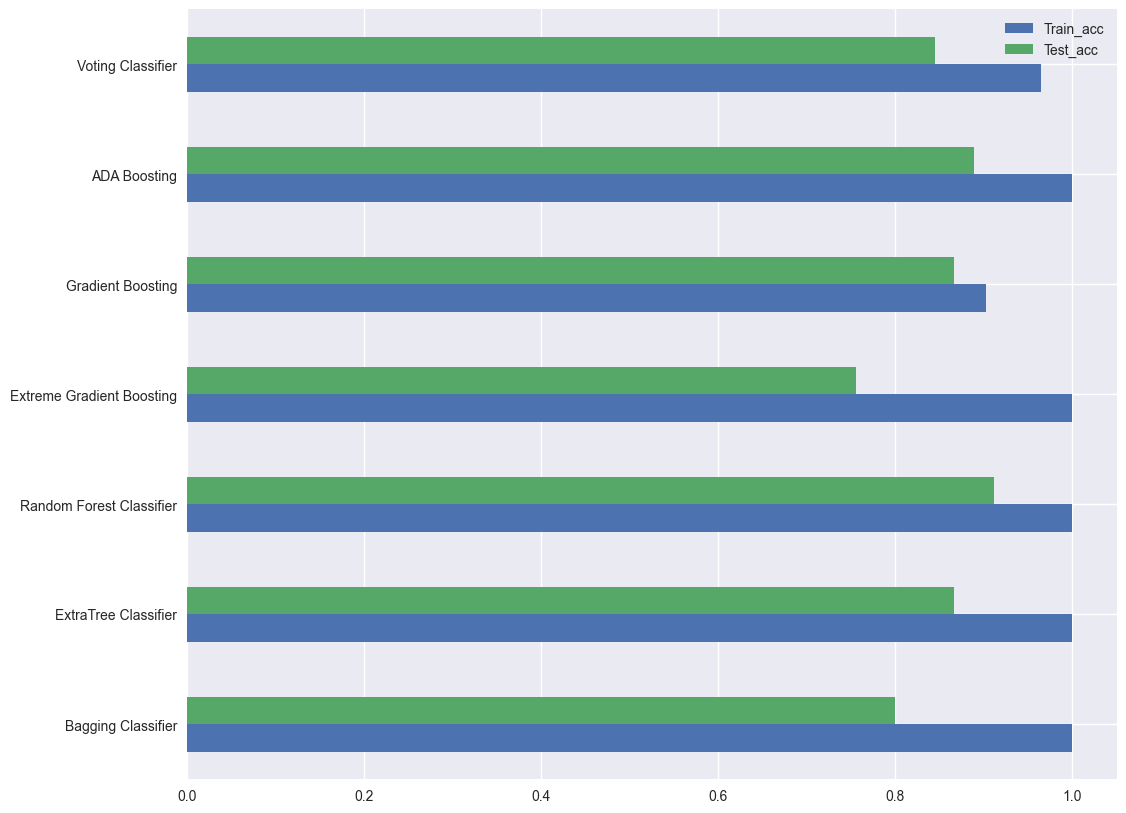

In [33]:
# Memvisualisasikan Training vs Test Accuracy Score sebagai berikut
scores = (model_selection)
scores.plot(kind='barh', figsize=(12, 10))

### Confusion Matrix

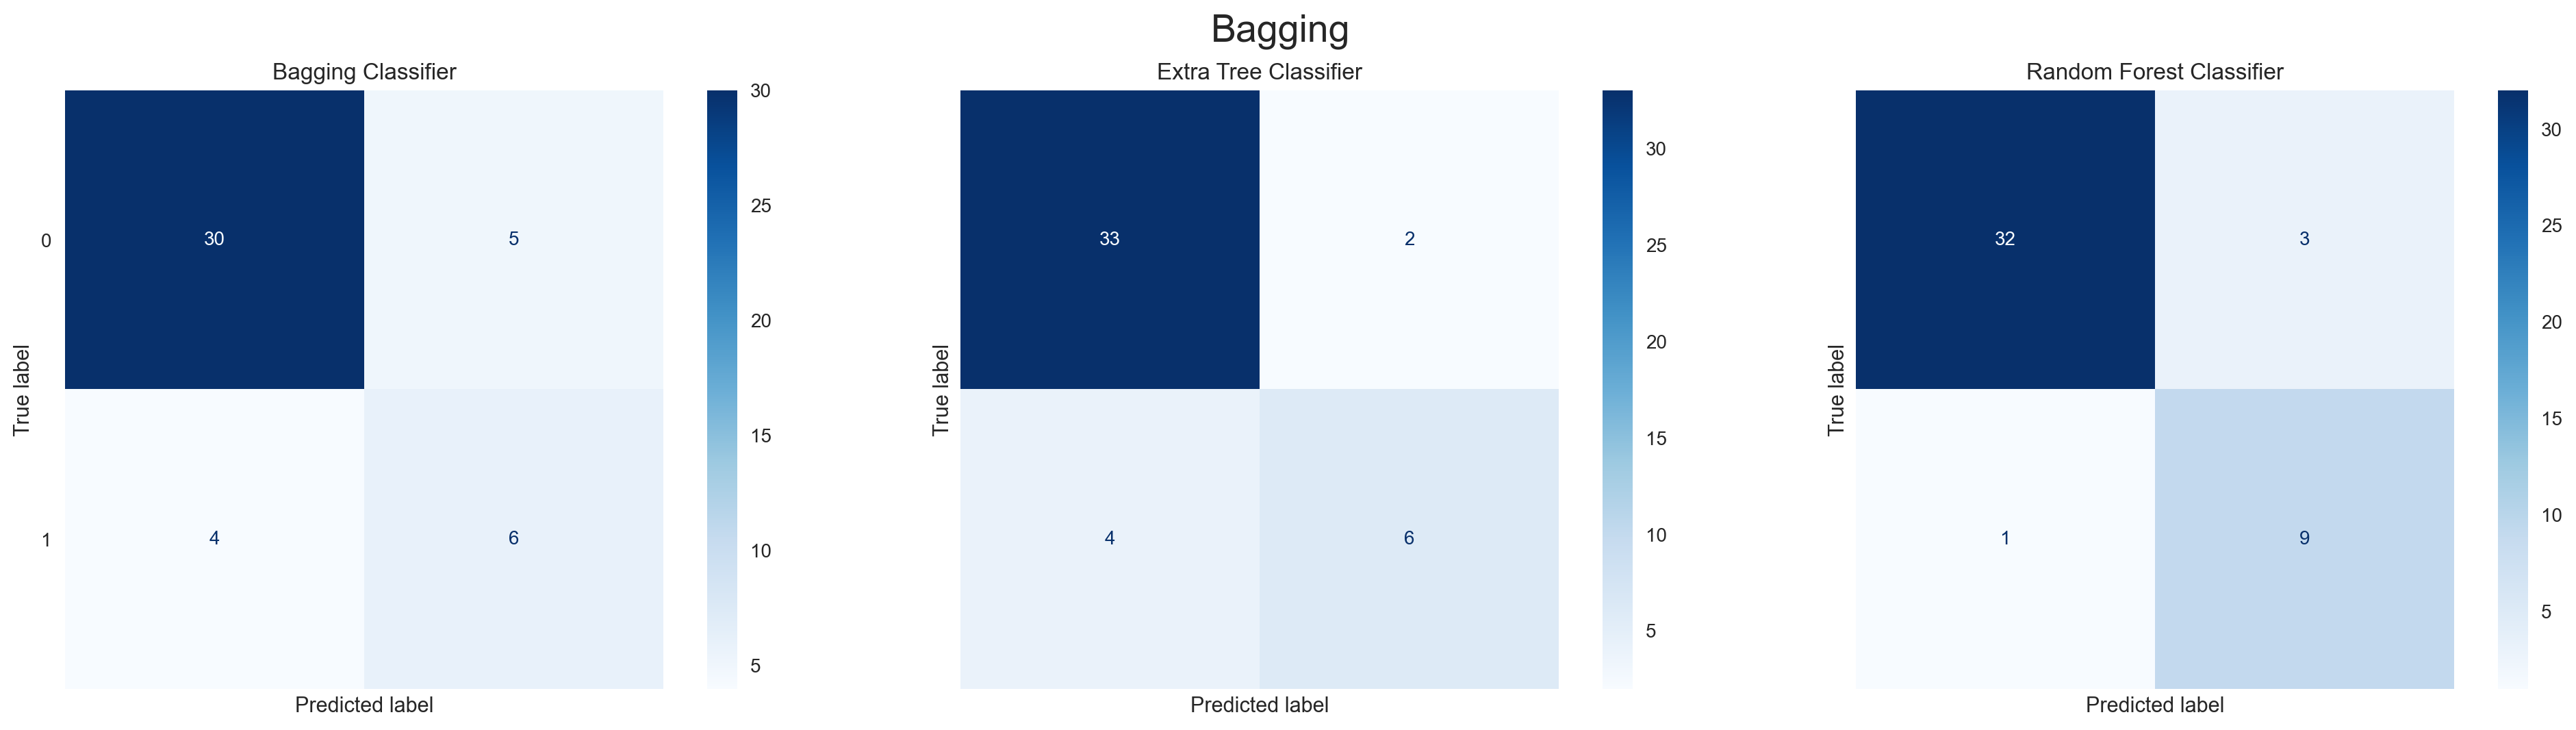

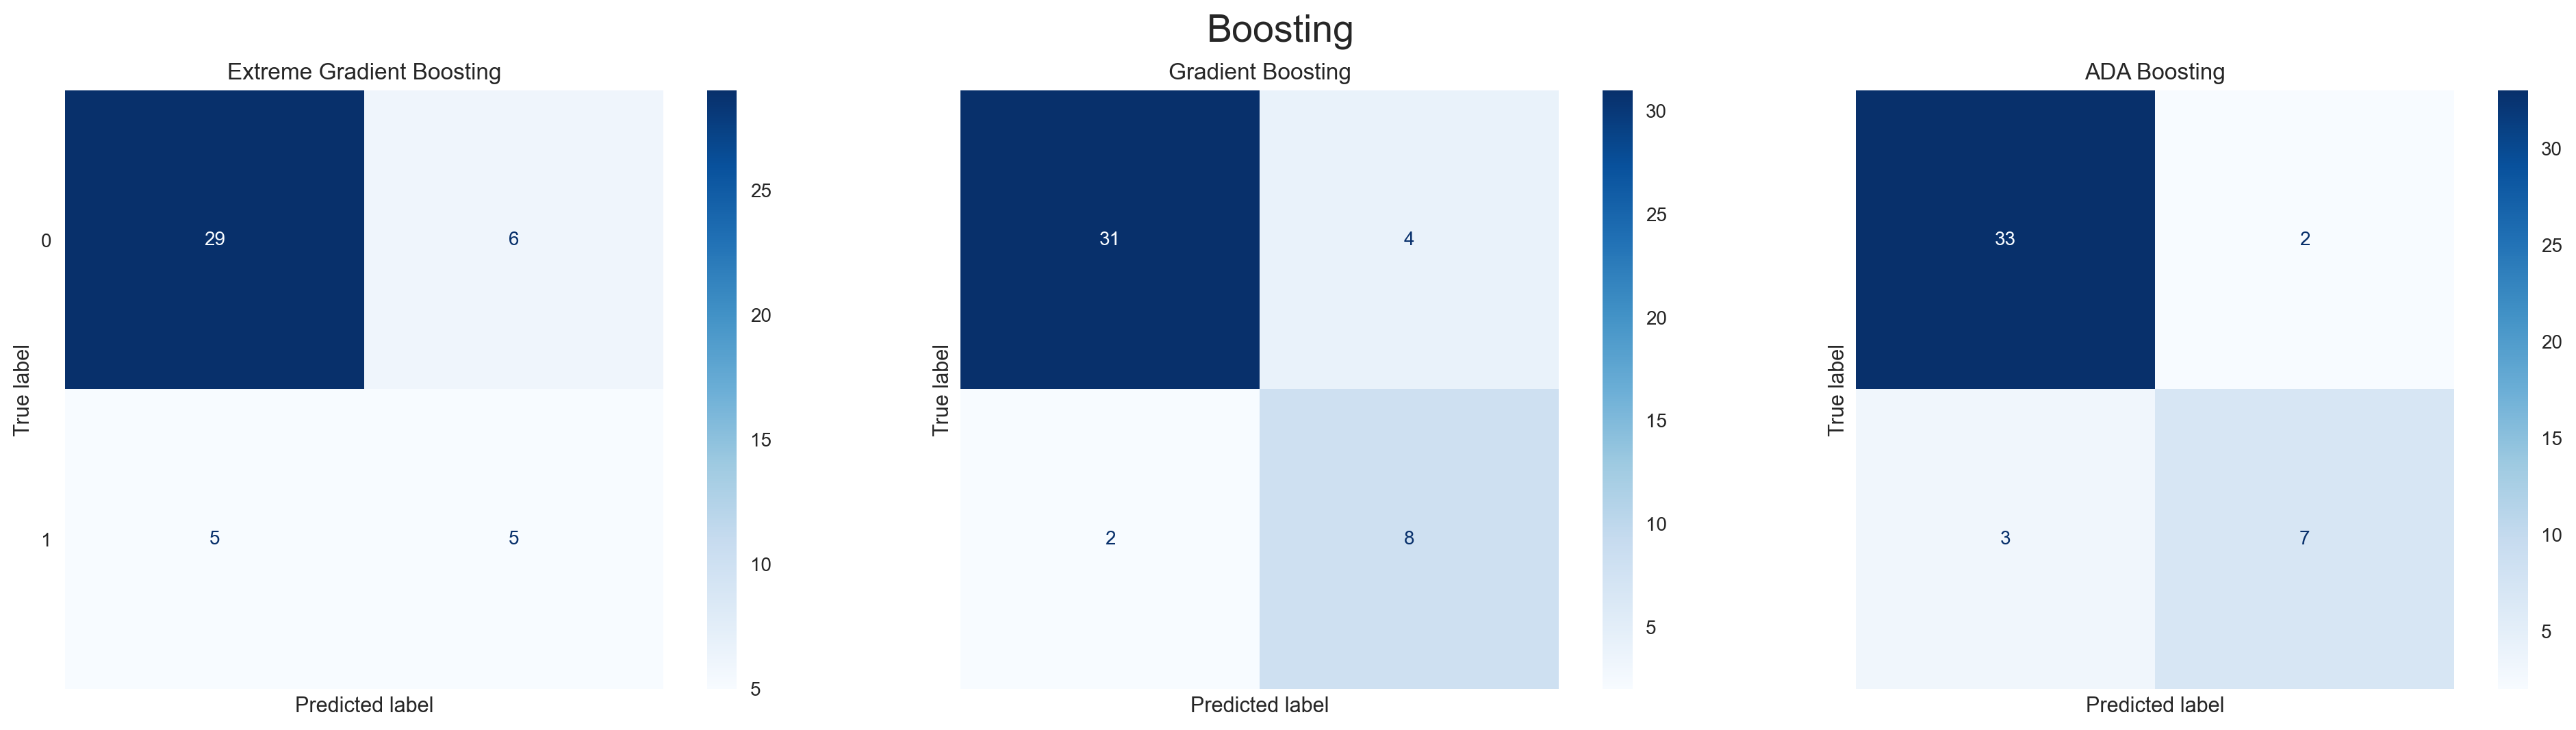

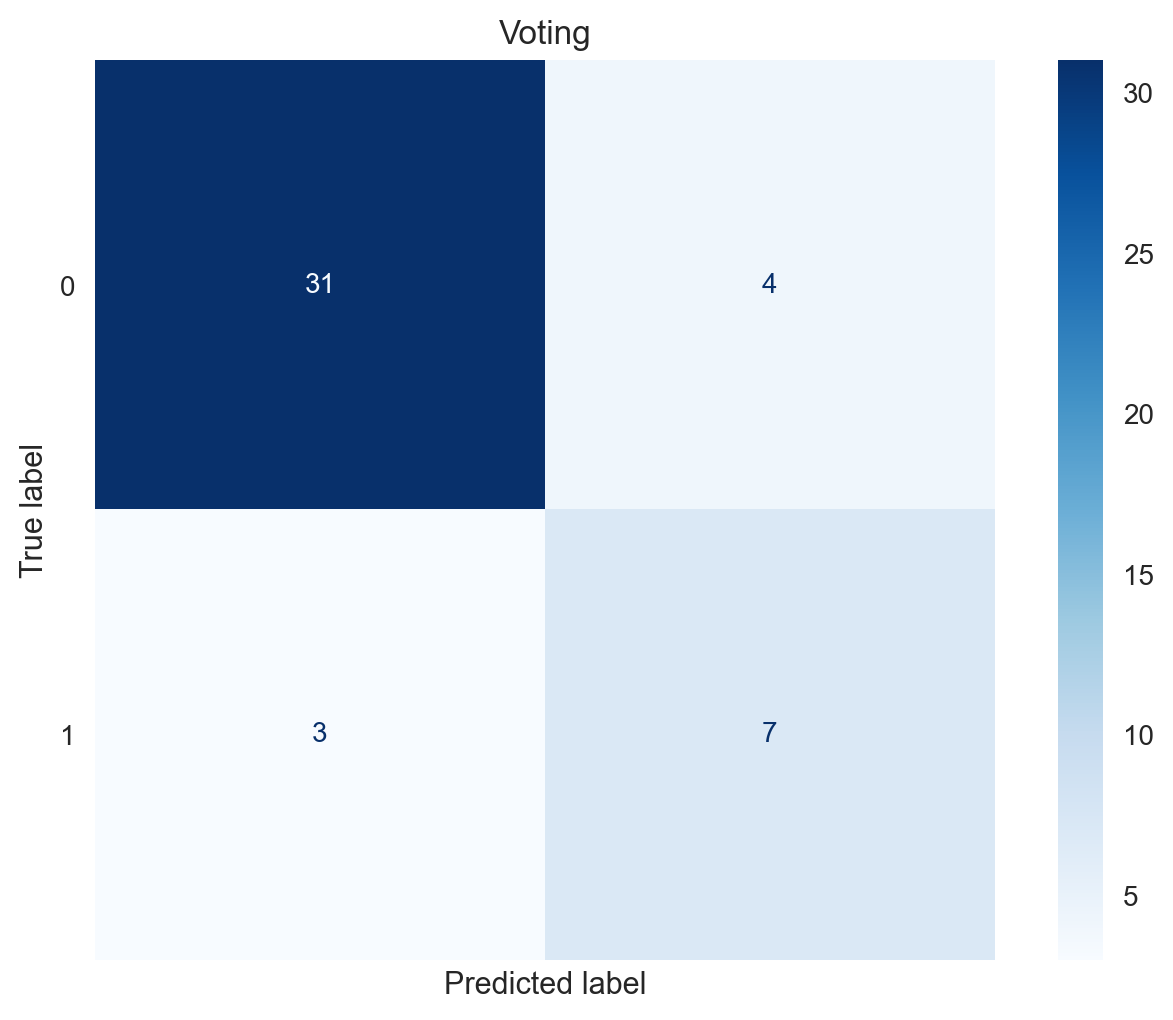

In [34]:
bagging_preds = [bag_pred,et_pred,rf_pred]
bagging_titles = ["Bagging Classifier","Extra Tree Classifier","Random Forest Classifier"]

boosting_preds = [xgb_pred,gb_pred,ada_pred]
boosting_titles = ["Extreme Gradient Boosting","Gradient Boosting", "ADA Boosting"]

voting_preds = [voting_pred]
voting_titles = ["Voting"]

for pred,title,suptitle in zip([bagging_preds,boosting_preds,voting_preds],[bagging_titles,boosting_titles,voting_titles],["Bagging","Boosting",""]):
    nrows,ncols = 2,3
    fig,ax = plt.subplots(nrows,ncols,figsize=(20,10),dpi=200,sharex=True,sharey=True)

    n = 0
    for nrow in range(nrows):
        for ncol in range(ncols):
            if n == len(pred):
                    break
            else:
                ConfusionMatrixDisplay.from_predictions(y_test,pred[n],cmap="Blues",ax=ax[nrow,ncol])
                ax[nrow,ncol].set_title(title[n])
                ax[nrow,ncol].grid(False)
                n += 1

    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    plt.suptitle(suptitle,fontsize=20)
    plt.tight_layout()
    plt.show()

Berdasarkan confusion matrix berbagai model di atas dapat dilihat pada Bagging, model terbaiknya adalah Random Forest. Sedangkan untuk Boosting, model terbaiknya adalah ADABoosting. Dan untuk Voting didapat confusion matrix yang cukup baik ,

### Comparing Correct and Incorrect Predictions and Models Performance Score (Accuracy, Precision, Recall, and F1 score) for Each Models

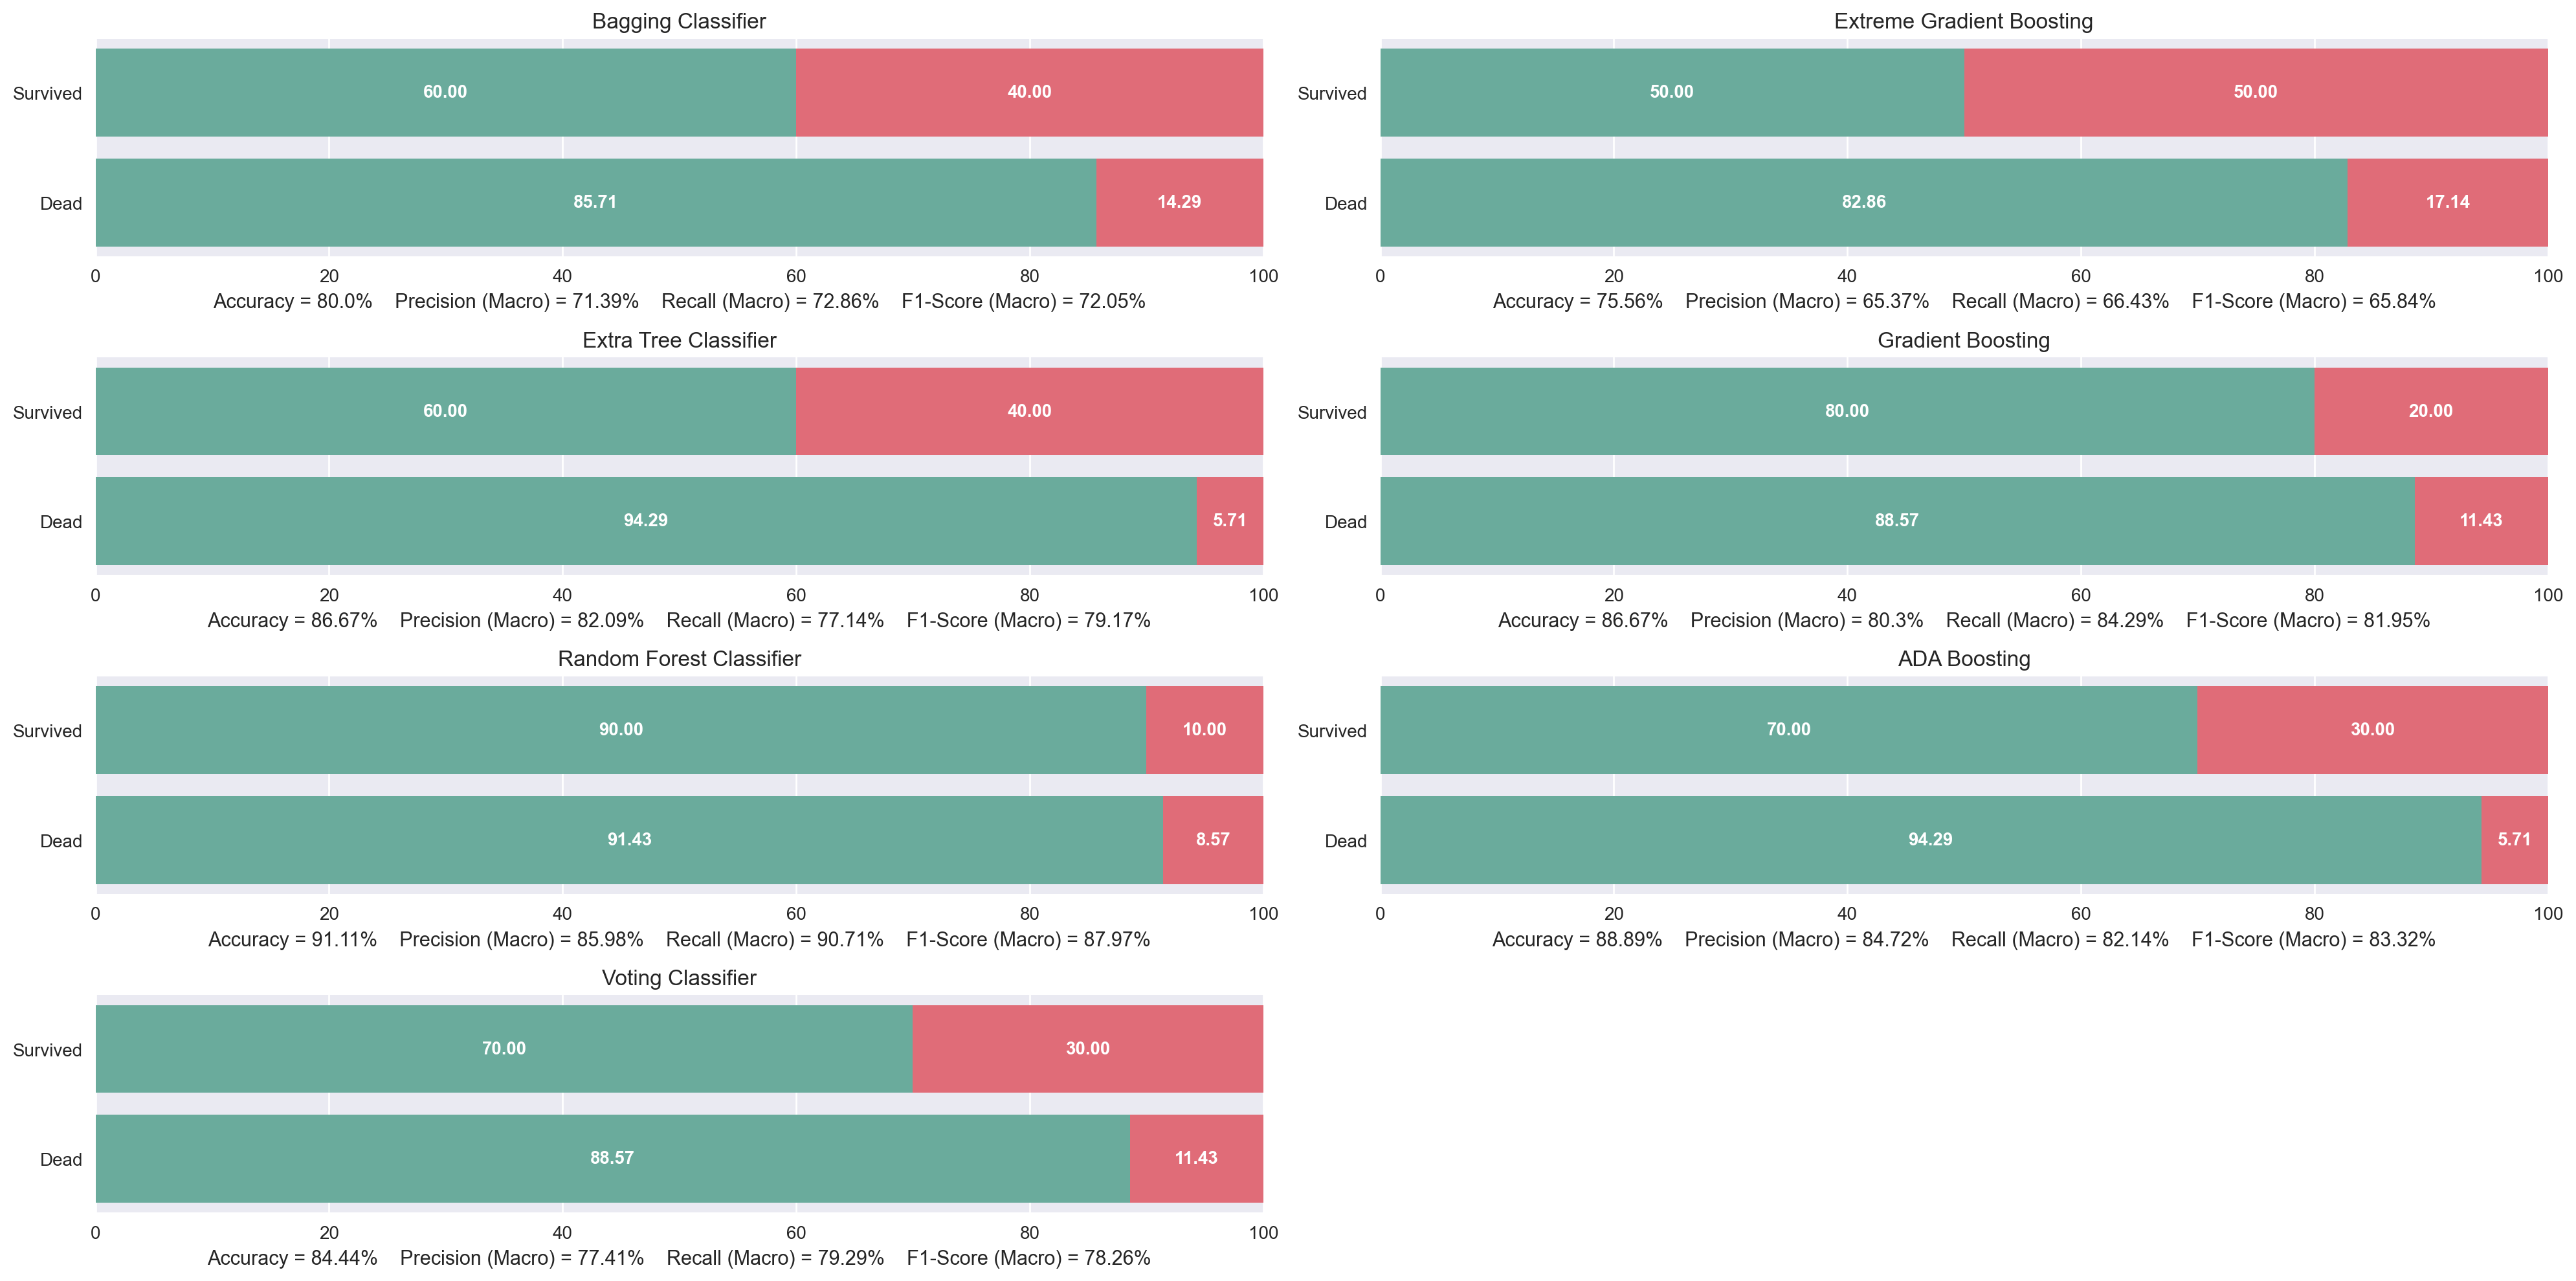

In [35]:
preds = [bag_pred,xgb_pred,et_pred,gb_pred,rf_pred,ada_pred,voting_pred,[""]]
titles = ["Bagging Classifier","Extreme Gradient Boosting","Extra Tree Classifier","Gradient Boosting", "Random Forest Classifier", "ADA Boosting","Voting Classifier",""]

for pred,title in zip([preds],[titles]):
    nrows,ncols = 4,2
    fig,ax = plt.subplots(nrows,ncols,figsize=(20,10),dpi=200)

    n = 0
    for nrow in range(nrows):
        for ncol in range(ncols):
            if len(pred[n]) == 1:
                pass
                n += 1
            else:
                true_survived = recall_score(y_test,pred[n],pos_label=1) * 100
                false_survived = 100 - true_survived
                true_dead = recall_score(y_test,pred[n],pos_label=0) * 100
                false_dead = 100 - true_dead
                
                accuracy = accuracy_score(y_test,pred[n])
                precision = precision_score(y_test,pred[n],average="macro")
                recall = recall_score(y_test,pred[n],average="macro")
                f1 = f1_score(y_test,pred[n],average="macro")

                if true_dead == 100:
                    ax[nrow,ncol].barh("Dead",true_dead,color="#6AAB9C")
                    ax[nrow,ncol].barh("Survived",true_survived,color="#6AAB9C")
                    ax[nrow,ncol].barh("Survived",false_survived,left=true_survived,color="#E06C78")
                elif false_dead == 100:
                    ax[nrow,ncol].barh("Dead",false_dead,color="#E06C78")
                    ax[nrow,ncol].barh("Survived",true_survived,color="#6AAB9C")
                    ax[nrow,ncol].barh("Survived",false_survived,left=true_survived,color="#E06C78")
                elif true_survived == 100:
                    ax[nrow,ncol].barh("Dead",true_dead,color="#6AAB9C")
                    ax[nrow,ncol].barh("Dead",false_dead,left=true_dead,color="#E06C78")
                    ax[nrow,ncol].barh("Survived",true_survived,color="#6AAB9C")
                elif false_survived / (true_survived + false_survived) * 10 == 100:
                    ax[nrow,ncol].barh("Dead",true_dead,color="#6AAB9C")
                    ax[nrow,ncol].barh("Dead",false_dead,left=true_dead,color="#E06C78")
                    ax[nrow,ncol].barh("Survived",false_survived,color="#E06C78")
                else:
                    ax[nrow,ncol].barh("Dead",true_dead,color="#6AAB9C")
                    ax[nrow,ncol].barh("Dead",false_dead,left=true_dead,color="#E06C78")
                    ax[nrow,ncol].barh("Survived",true_survived,color="#6AAB9C")
                    ax[nrow,ncol].barh("Survived",false_survived,left=true_survived,color="#E06C78")

                ax[nrow,ncol].set_title(title[n])
                ax[nrow,ncol].set_xlim(xmax=100)
                ax[nrow,ncol].set_xlabel(
                    f"Accuracy = {round(accuracy * 100,2)}%    Precision (Macro) = {round(precision * 100,2)}%    Recall (Macro) = {round(recall * 100,2)}%    F1-Score (Macro) = {round(f1 * 100,2)}%"
                )

                for container in ax[nrow,ncol].containers:
                    ax[nrow,ncol].bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

                n += 1

    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

Penting untuk mengetahui persentase correct dan incorrect predictions untuk setiap model, karena apabila hanya melihat accuracy score saja kurang cukup untuk mengevaluasi model terutama untuk dataset yang imbalance. Warna hijau mewakili Correct Prediction dan warna merah untuk Incorrect Prediction. Dari subplots di atas dapat dilihat bahwa model Random Forest merupakan model terbaik. Karena selain accuracy scorenya tertinggi, persentase correct dan incorrect predictionsnya juga paling baik apabila dibandingkan dengan model lainnya. 

## J. Models Inference

In [36]:
model_inference = {
    'age': [61,16,84,33],
    'anaemia': [0,1,1,0],
    'creatinine_phosphokinase': [258,96,141,123],
    'diabetes': [1,0,1,1],
    'ejection_fraction': [94,37,81,45],
    'high_blood_pressure': [1,1,0,0],
    'platelets': [137000,265000,178000,310000],
    'serum_creatinine': [9.5,0.8,1.9,4.4],
    'serum_sodium': [117,136,165,172],
    'sex': [1,0,1,0],
    'smoking': [0,1,0,1],
    'time': [10,2,0,13]
}

model_inference = pd.DataFrame(model_inference)
model_inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,61,0,258,1,94,1,137000,9.5,117,1,0,10
1,16,1,96,0,37,1,265000,0.8,136,0,1,2
2,84,1,141,1,81,0,178000,1.9,165,1,0,0
3,33,0,123,1,45,0,310000,4.4,172,0,1,13


In [37]:
# Melakukan pemodelan terhadap data baru
pred1 = bag_model.predict(model_inference)
pred2 = et_model.predict(model_inference)
pred3 = rf_model.predict(model_inference)
pred4 = xgb_model.predict(model_inference)
pred5 = gb_model.predict(model_inference)
pred6 = ada_model.predict(model_inference)
pred7 = voting_model.predict(model_inference)

# Untuk melihat prediksi dari pemodelan yang sudah dibuat terhadap data baru
print("Bagging Classifier = ",pred1)
print("Extra Tree Classifier = ",pred2)
print("Random Forest Classifier = ",pred3)
print("XGboosting = ",pred4)
print("Gradient Boosting = ",pred5)
print("ADABoost = ",pred6)
print("Voting Classifier = ",pred7)

Bagging Classifier =  [0 0 1 0]
Extra Tree Classifier =  [0 0 0 0]
Random Forest Classifier =  [0 0 1 0]
XGboosting =  [0 0 1 1]
Gradient Boosting =  [0 0 0 0]
ADABoost =  [0 1 1 0]
Voting Classifier =  [1 1 1 1]


In [38]:
models = [bag_model,et_model,rf_model,xgb_model,gb_model,ada_model,voting_model]
names = ["bagging_model","extratree_model","randomforest_model","xgboost_model","gradientboost_model","adaboost_model","votingclassifier_model"]
extension = "json"

for model,name in zip(models,names):
    with open(f"{name}.{extension}","wb") as files:
        dump(model,files)
    print(f"{name}.{extension} has been downloaded")

bagging_model.json has been downloaded
extratree_model.json has been downloaded
randomforest_model.json has been downloaded
xgboost_model.json has been downloaded
gradientboost_model.json has been downloaded
adaboost_model.json has been downloaded
votingclassifier_model.json has been downloaded


## K. Conclusion

Kesimpulan:
- Melalui analisis proyek ini menggunakan dataset "heart_failure_clinical_records_dataset.csv" dengan 299 entitas dengan 13 atribut yang berpotensi memiliki risiko terkena gagal jantung. Pada dataset ini terdapat kondisi imbalance (kelas tidak seimbang karena terdapat rasio yang tidak proporsional di setiap kelas) sehingga dilakukan resampling menggunakan SMOTE.
- Ensemble learning model pada proyek ini menggunakan tiga teknik, yakni: Bagging (Bagging Classifier, ExtraTree Classifier, dan Random Forest Classifier), Boosting (Extreme Gradient Boosting, Gradient Boosting, dan ADA Boosting), serta Voting. Pada teknik Bagging, model terbaiknya adalah Random Forest. Sedangkan untuk teknik Boosting, model terbaiknya adalah ADA Boost. Dan untuk Voting hasilnya juga cukup baik.
- Setelah dilihat evaluasi pada semua aspek, dapat disimpulkan bahwa model Random Forest merupakan model terbaik. Karena selain accuracy scorenya tertinggi (91.11%), persentase correct dan incorrect predictionsnya juga paling baik apabila dibandingkan dengan model lainnya. Ensemble model Random Forest dapat memprediksi risiko gagal jantung dengan akurasi yang baik. Model ini memiliki performa yang kuat dalam mengidentifikasi pasien yang berpotensi mengalami gagal jantung dengan akurasi yang konsisten pada berbagai dataset yang telah diproses.

Proyek ini memberikan pemahaman penting terkait risiko terkena gagal jantung dan bagaimana pendekatan machine learning dapat digunakan untuk mendukung deteksi dini serta penanganan yang lebih tepat terhadap kasus-kasus potensial terkena penyakit yang serius ini. Dengan memanfaatkan informasi dari dataset klinis, dapat memberikan manfaat yang lebih baik dalam pengelolaan layanan kesehatan dan pengambilan keputusan yang lebih akurat dalam konteks medis.